In [1]:
from itertools import izip
import matplotlib.pyplot as plt
%matplotlib inline

def plot_assignement_evolution(list_X_df, colors):
    for i, assignement in enumerate(list_X_df[0].columns):
        cumulate_assignements = []
        try:
            for X_df in list_X_df:
                cumulate_assignements.append( X_df[assignement].values )
        except Exception as e:
            print "skip X_df,", e.message
            continue
        plt.subplots(figsize=(10, 5))
        for cumulate_assignement, color in izip(cumulate_assignements, colors):
            plt.plot(cumulate_assignement, c=color, markersize=1)
        plt.title(assignement.decode('utf-8'))
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()
plt.show()

In [2]:
import os.path as osp
from time import time
from toolbox import pipline

data_dir = "data/"
data_filename = "train_2011_2012_2013.csv"
data_path = osp.join(data_dir, data_filename)

# it takes at least 3 min to load the data
print "Loading Fev 2011..."
t0 = time()
X_2011_month_df = pipline(data_path, "2011-02-")
print "Fev 2011 loaded...", time() - t0, "s"
print "Loading Fev 2012"
t0 = time()
X_2012_month_df = pipline(data_path, "2012-02-")
print "Fev 2012 loaded...", time() - t0, "s"
print "Loading Fev 2013"
t0 = time()
X_2013_month_df = pipline(data_path, "2013-02-")
print "Fev 2013 loaded...", time() - t0, "s"

Loading Fev 2011...
Fev 2011 loaded... 53.5786409378 s
Loading Fev 2012
Fev 2012 loaded... 55.7632639408 s
Loading Fev 2013
Fev 2013 loaded... 71.6153390408 s


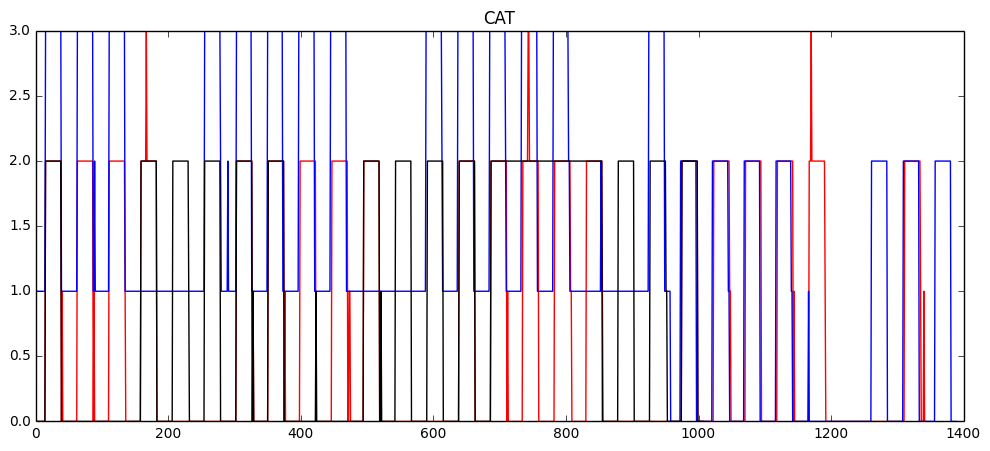

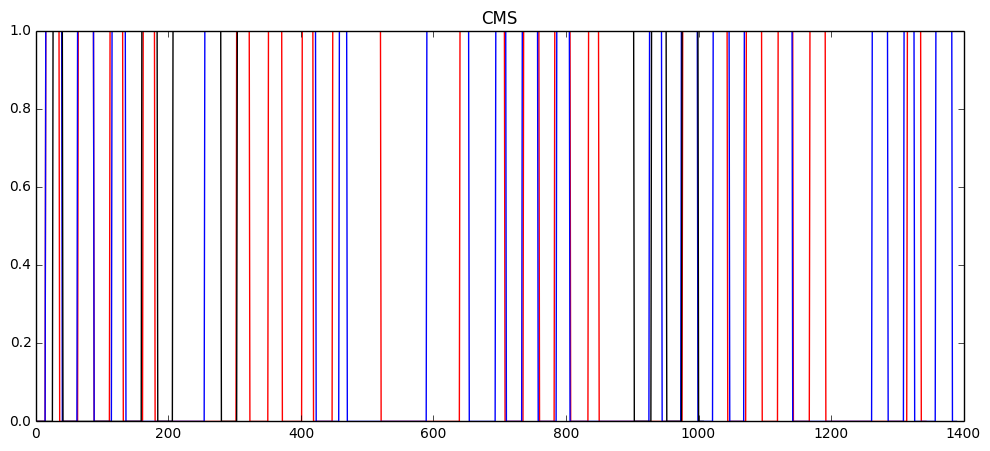

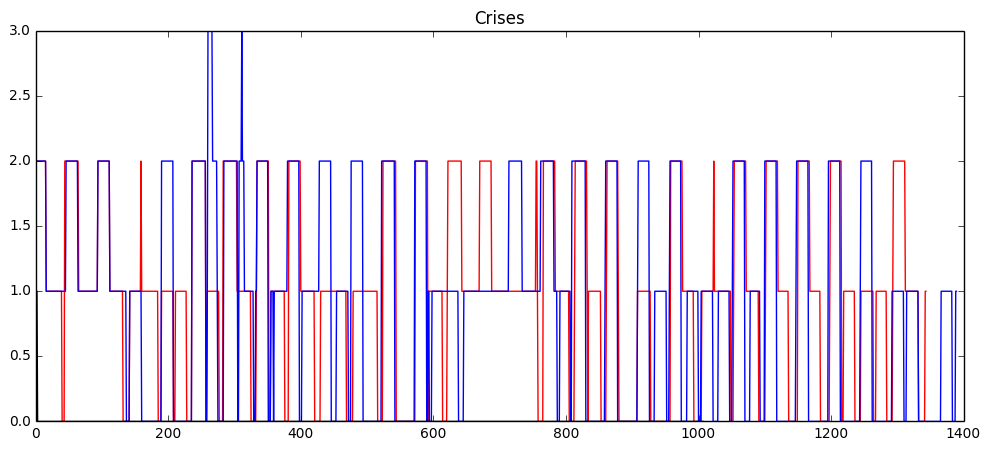

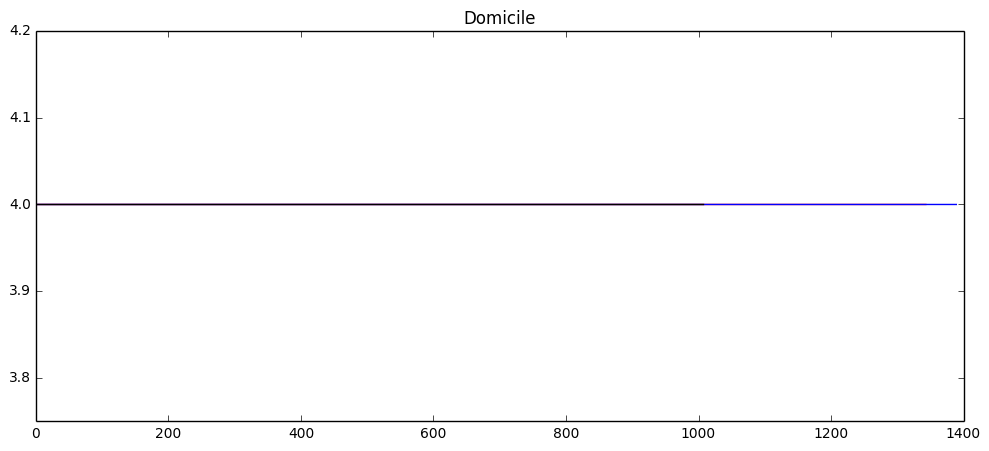

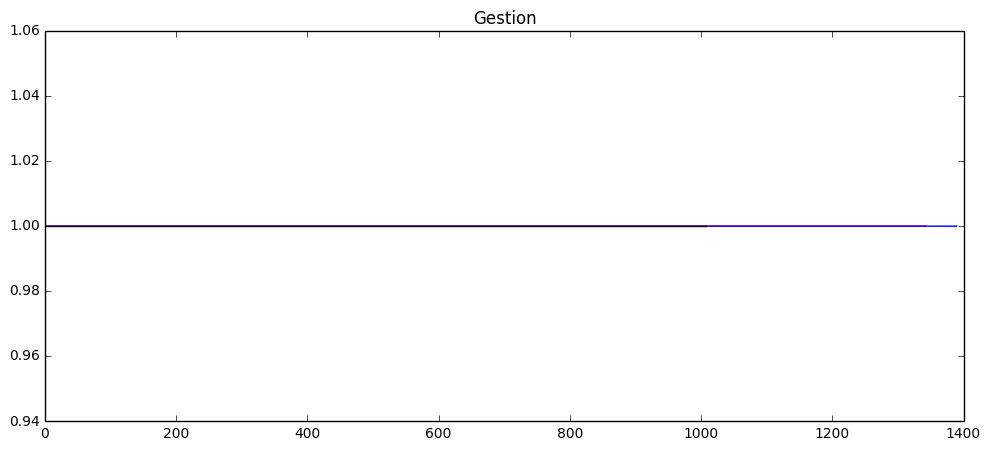

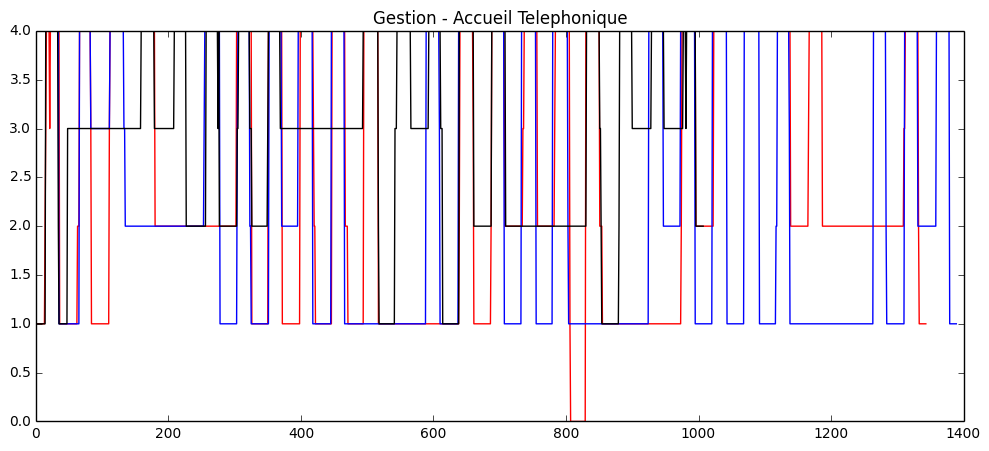

skip X_df, Gestion Amex


/home/hcherkaoui/.virtualenvs/dev/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6


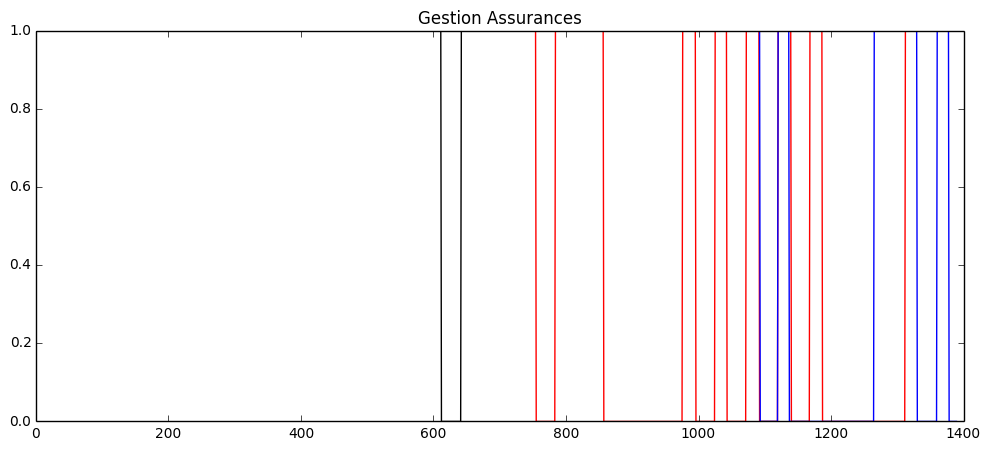

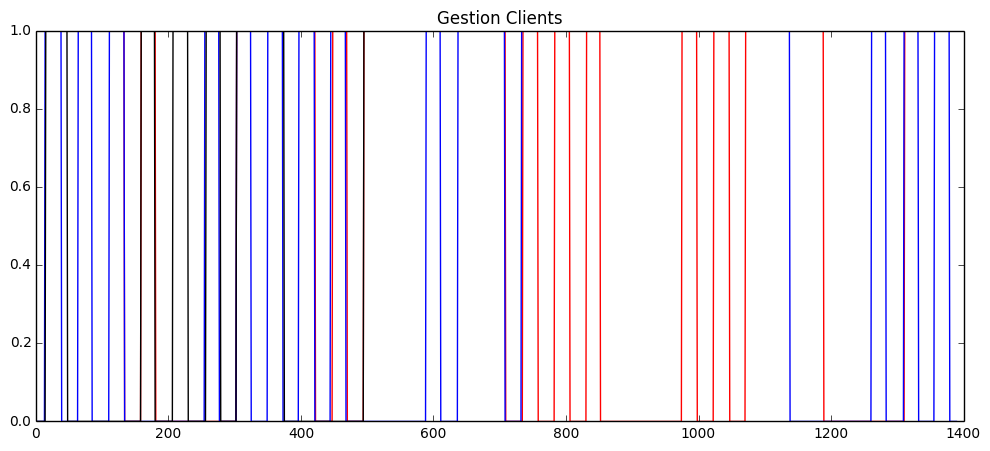

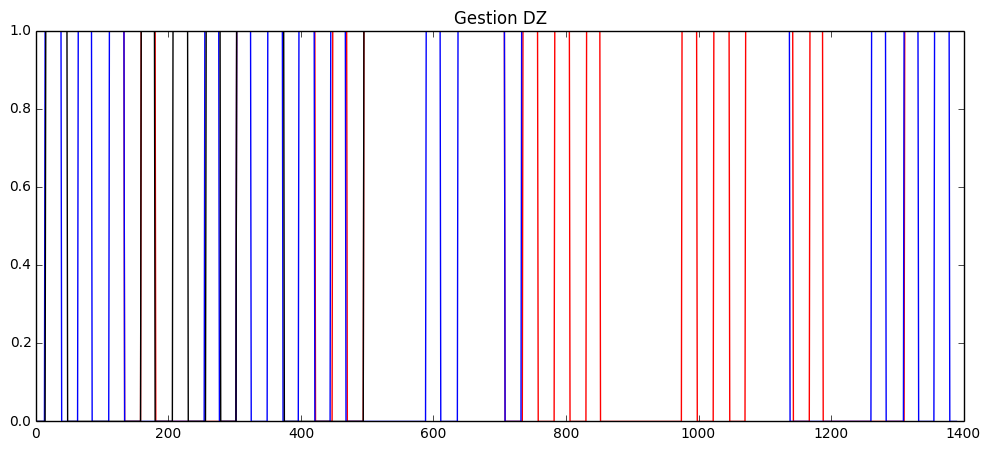

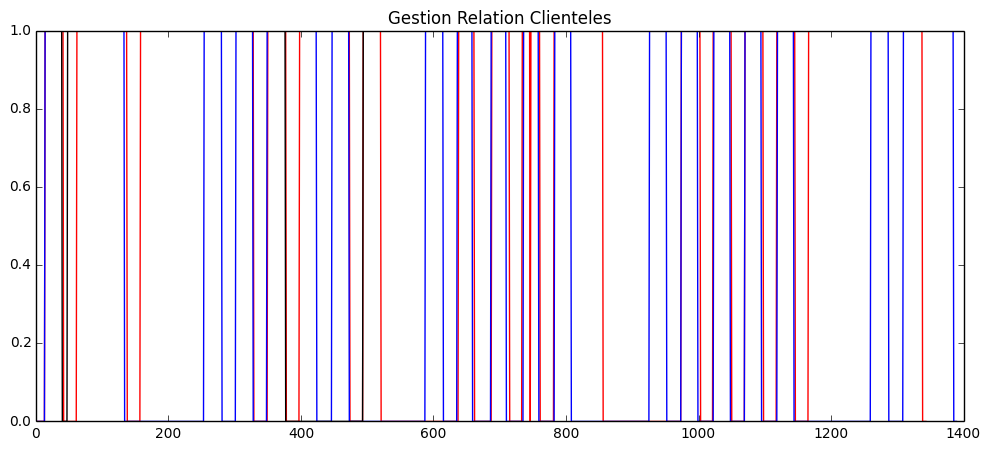

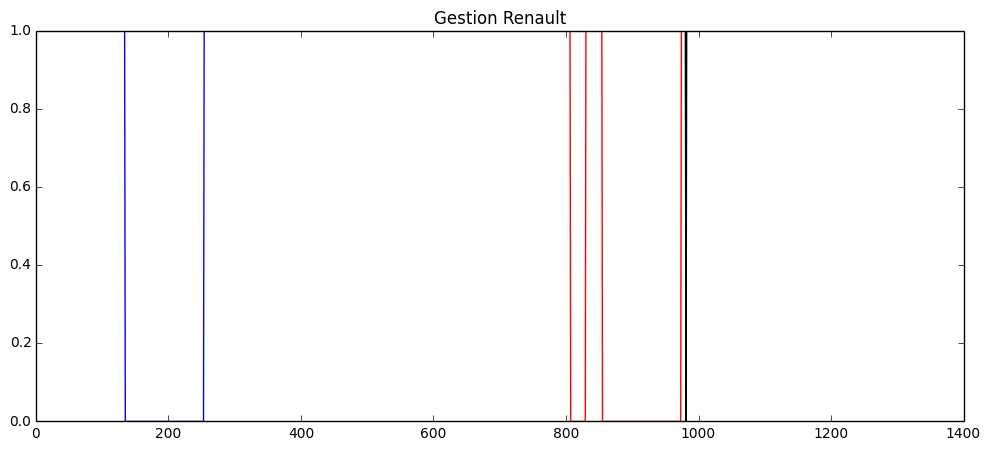

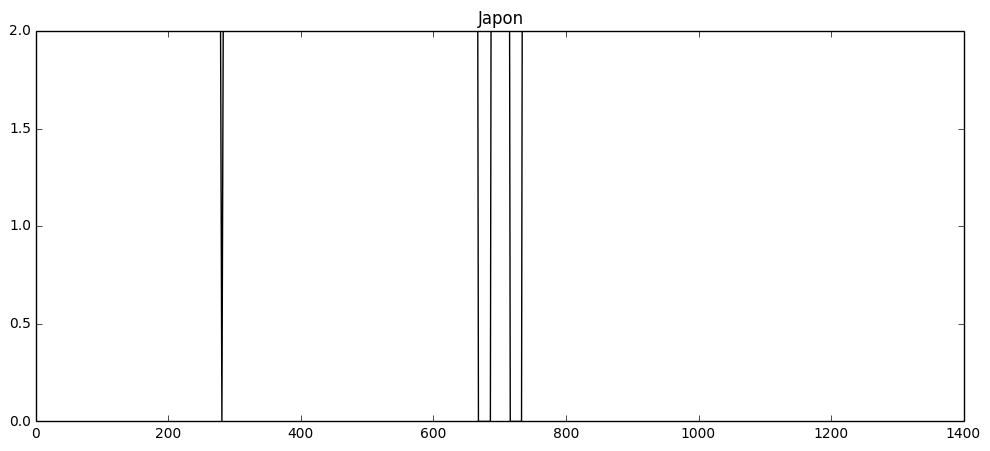

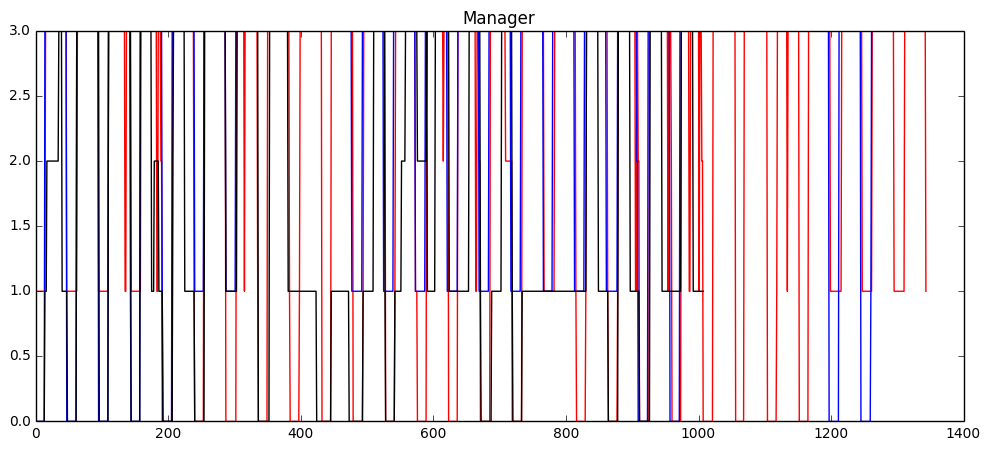

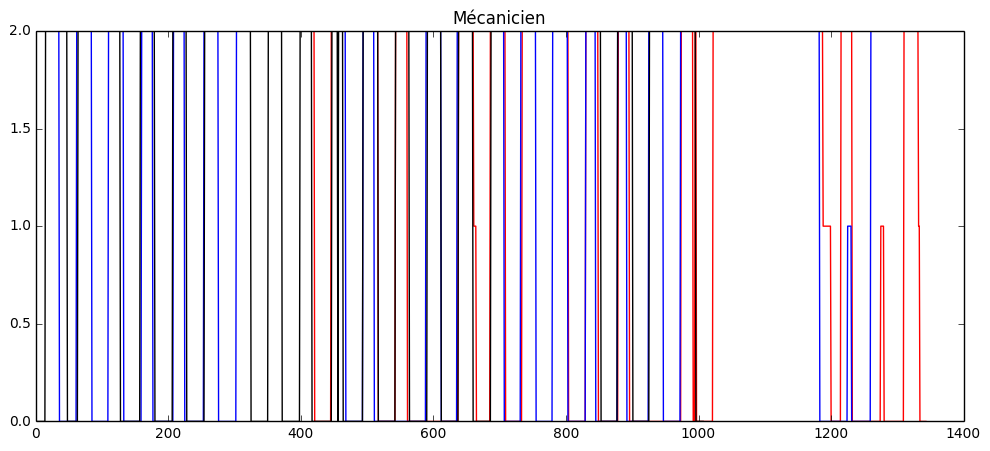

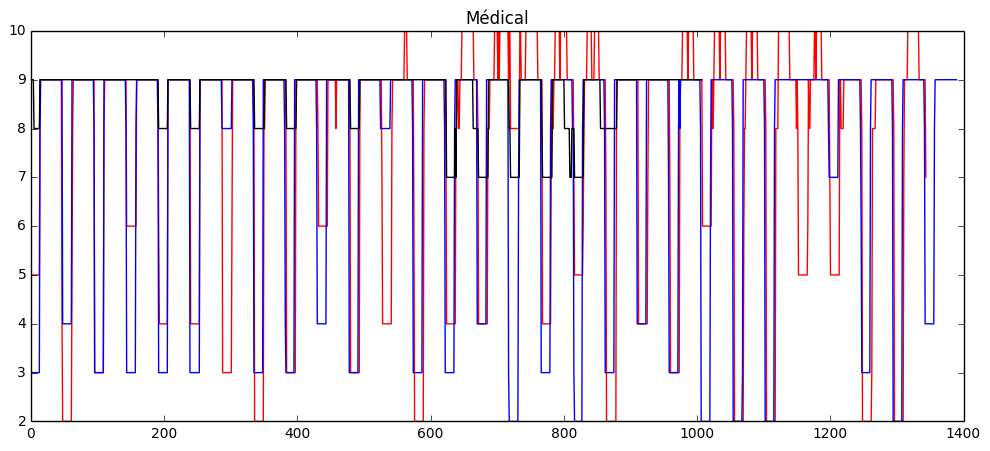

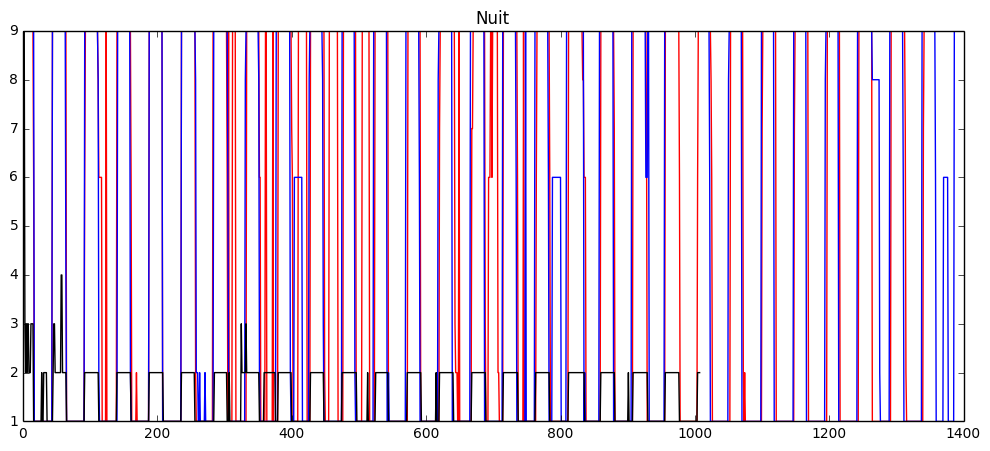

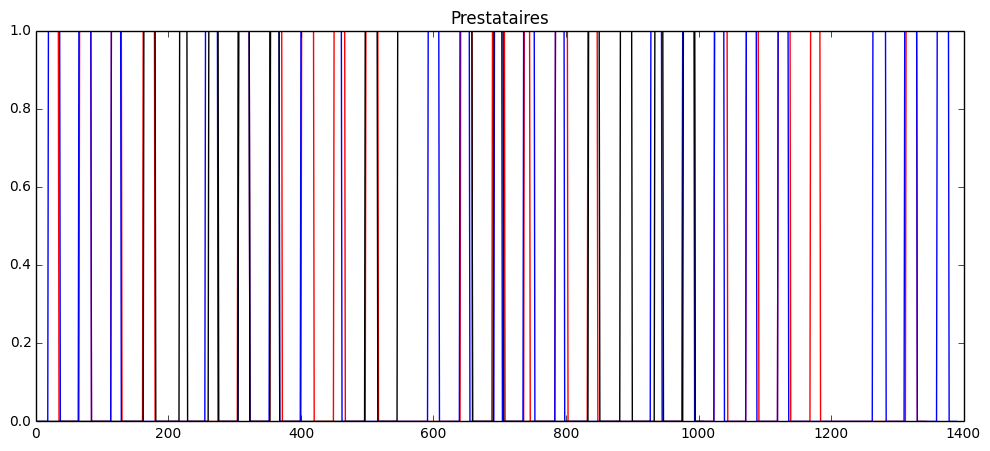

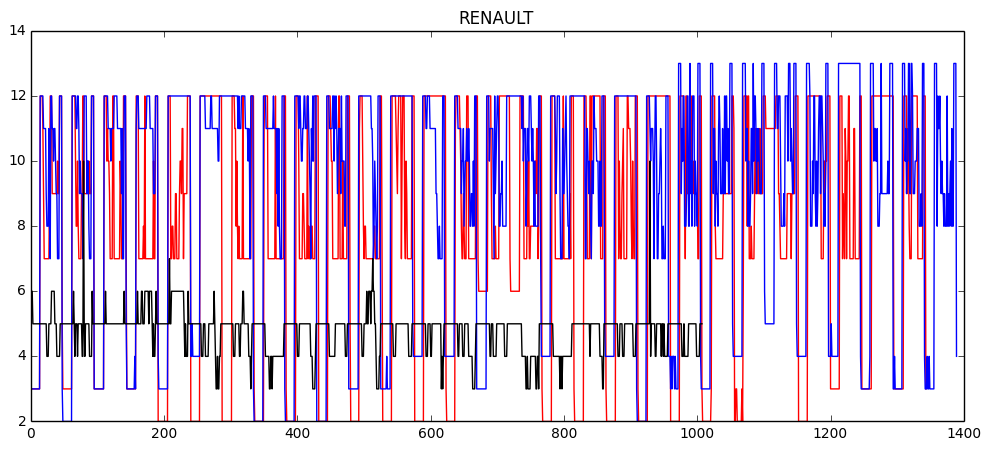

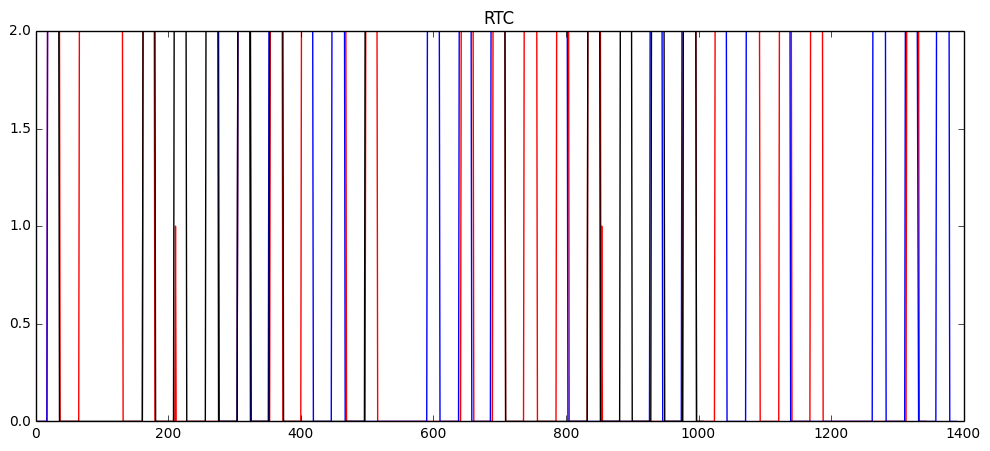

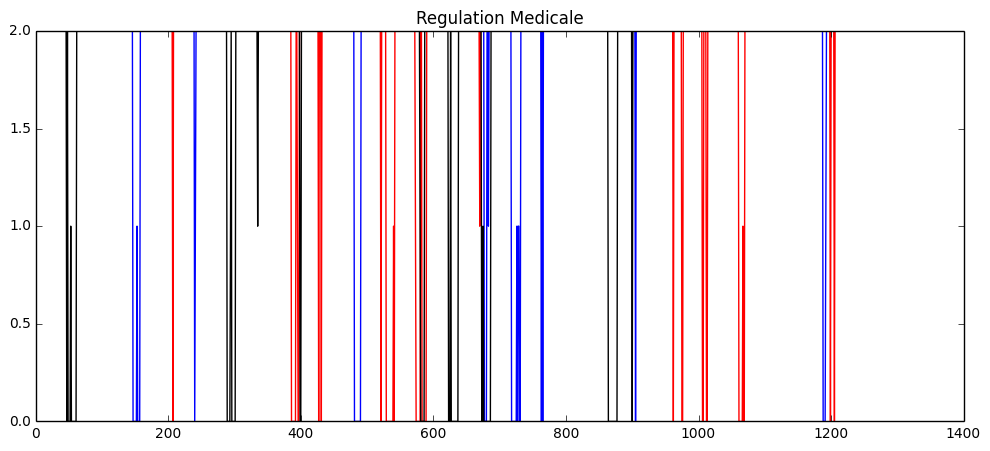

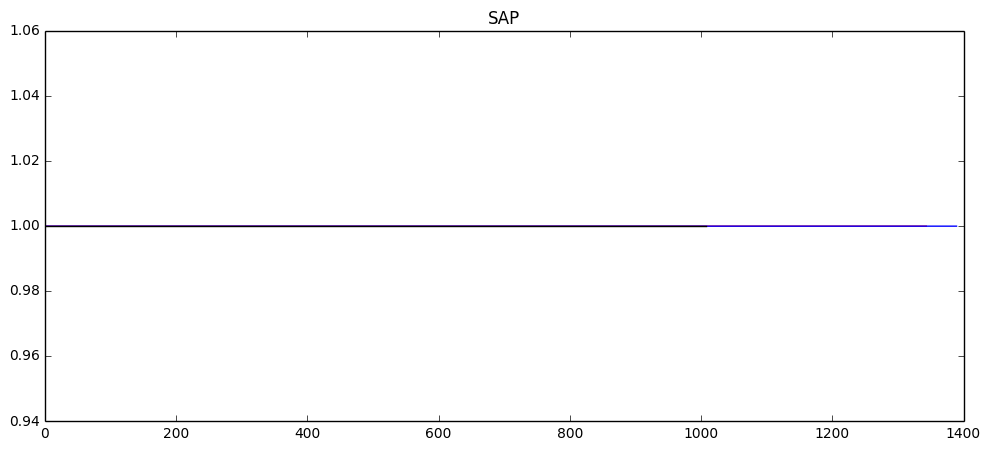

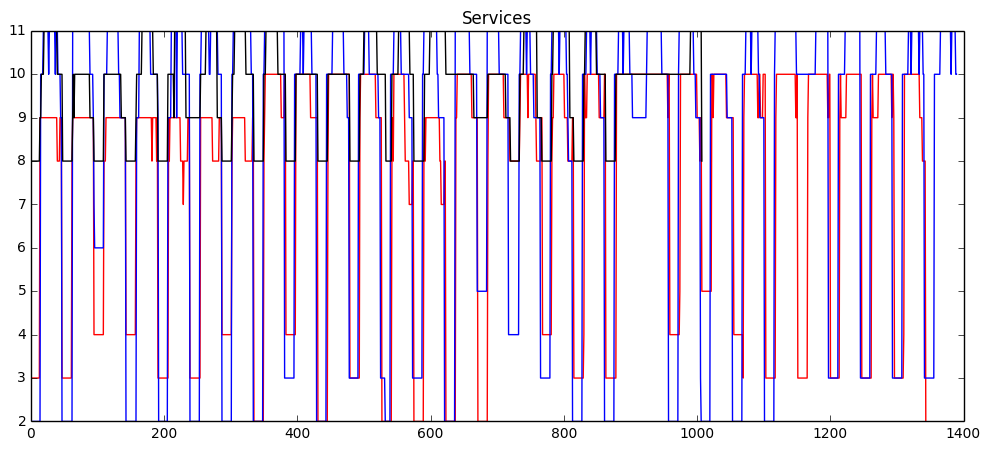

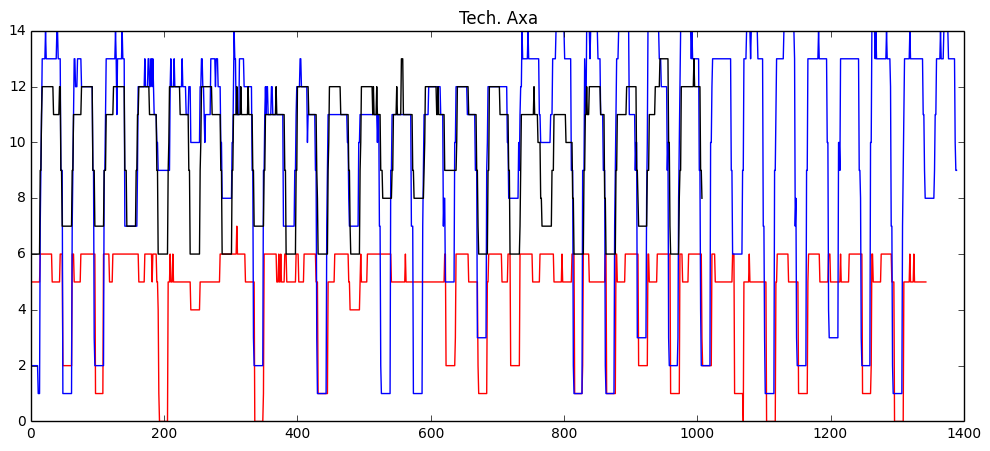

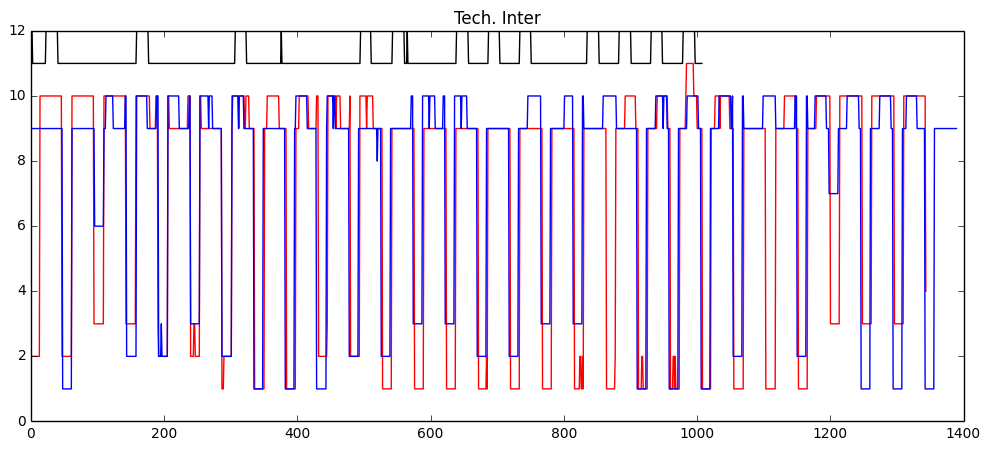

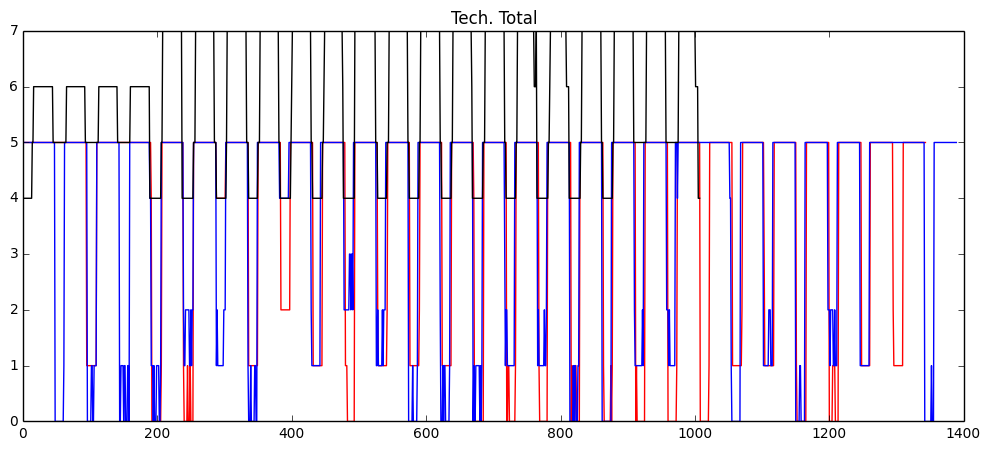

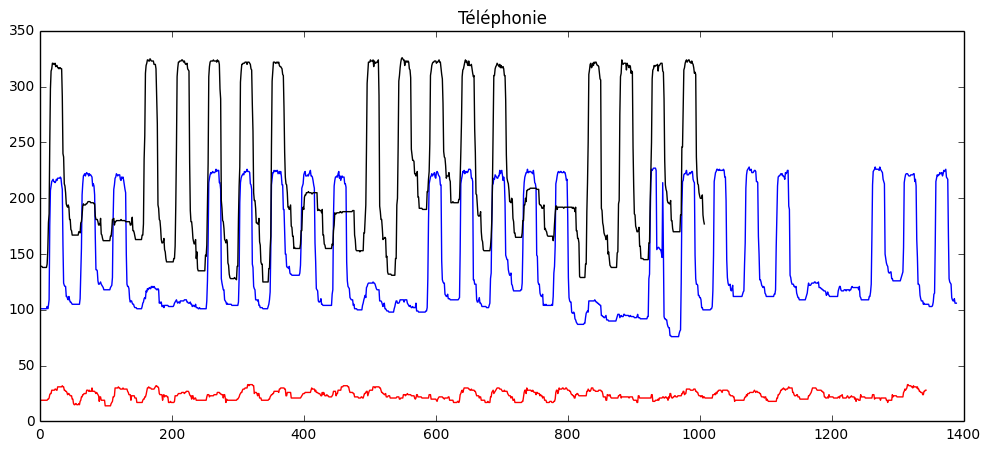

In [3]:
plot_assignement_evolution([X_2011_month_df, X_2012_month_df, X_2013_month_df], ['red', 'blue', 'black'])

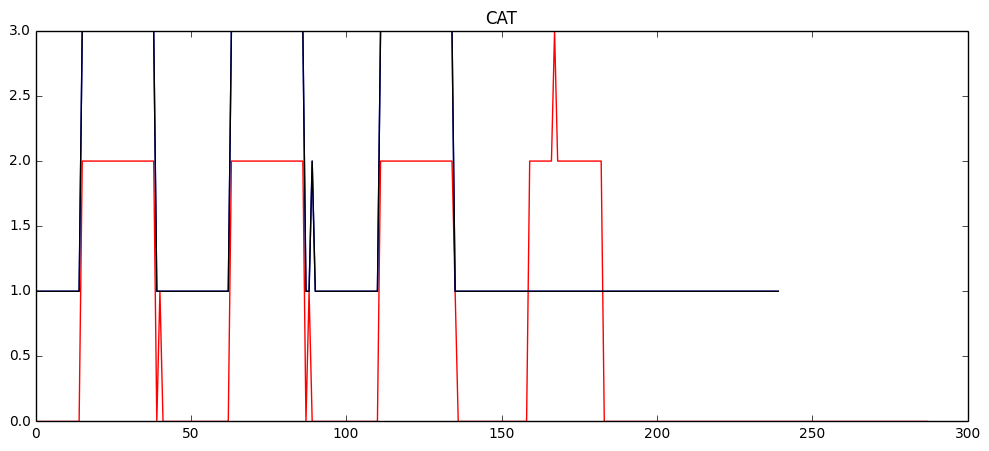

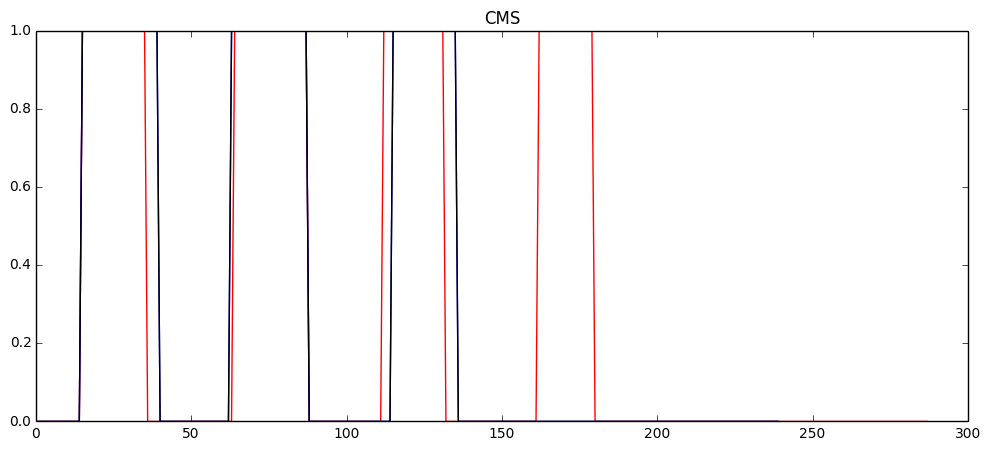

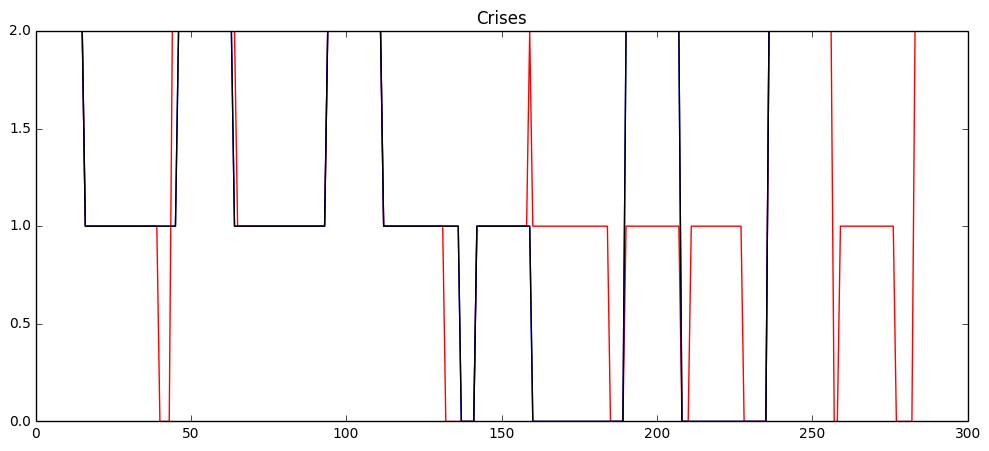

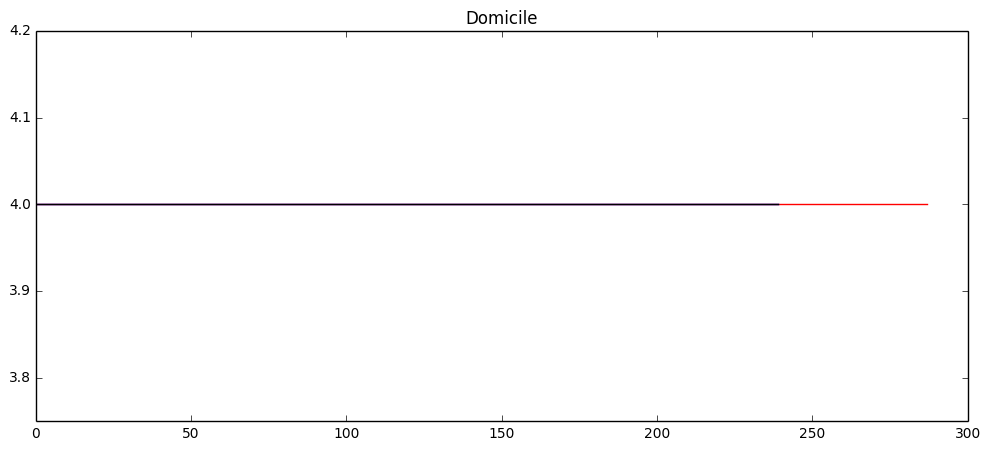

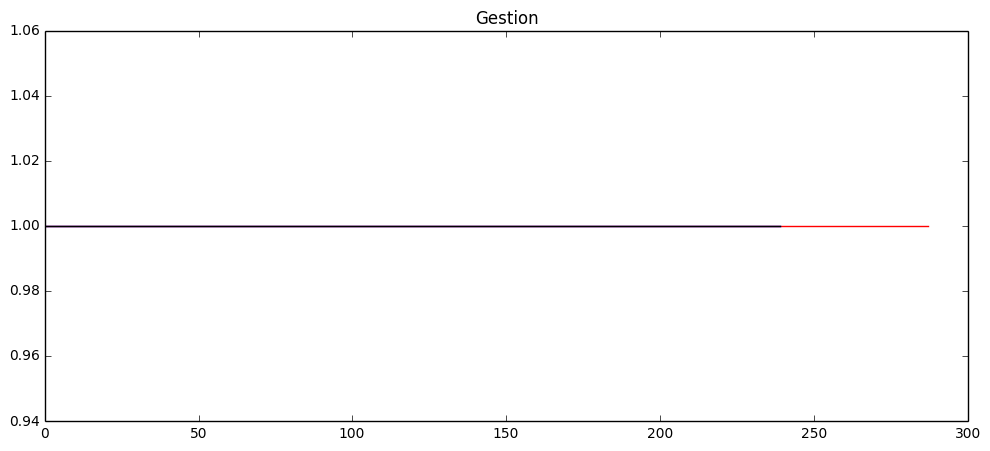

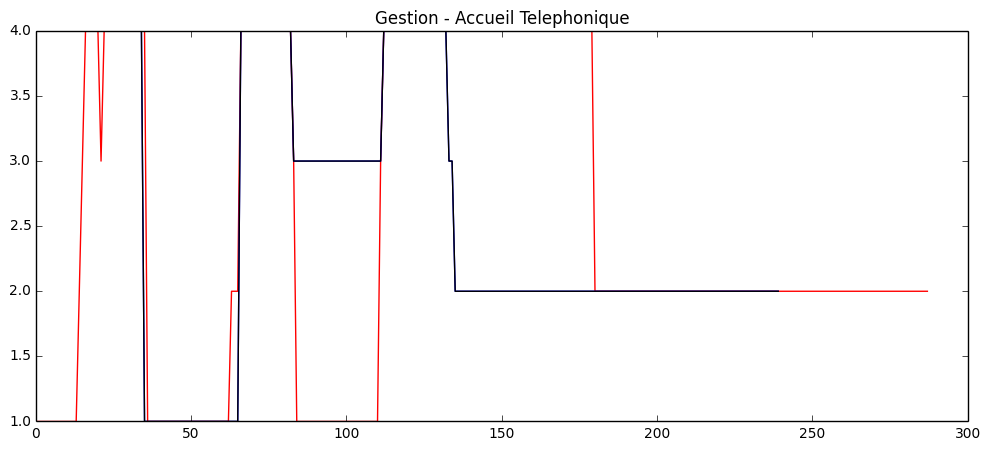

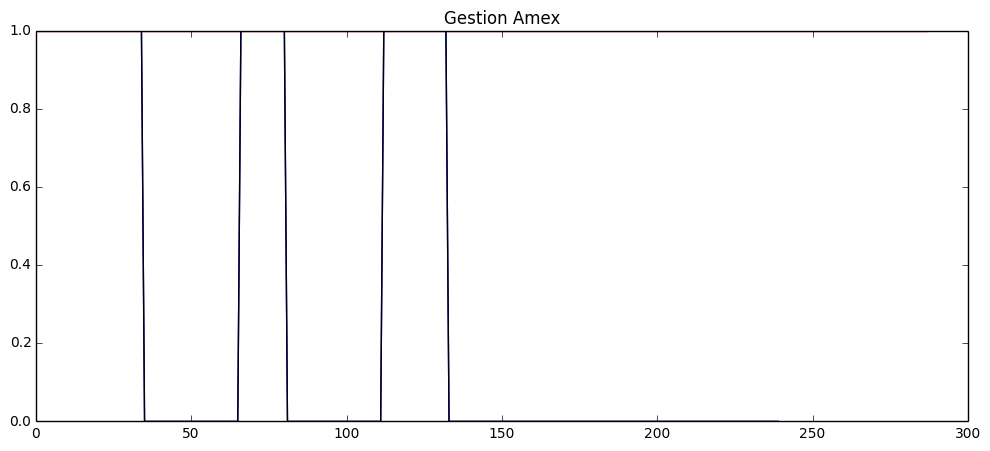

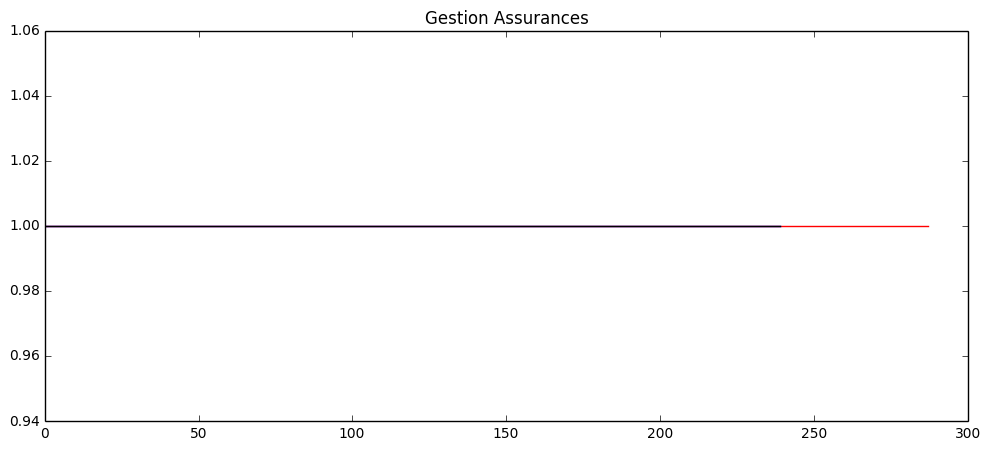

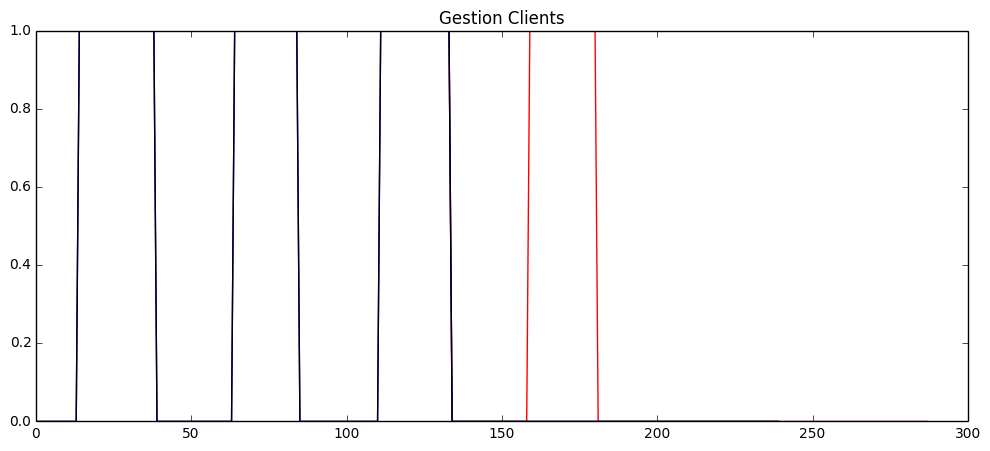

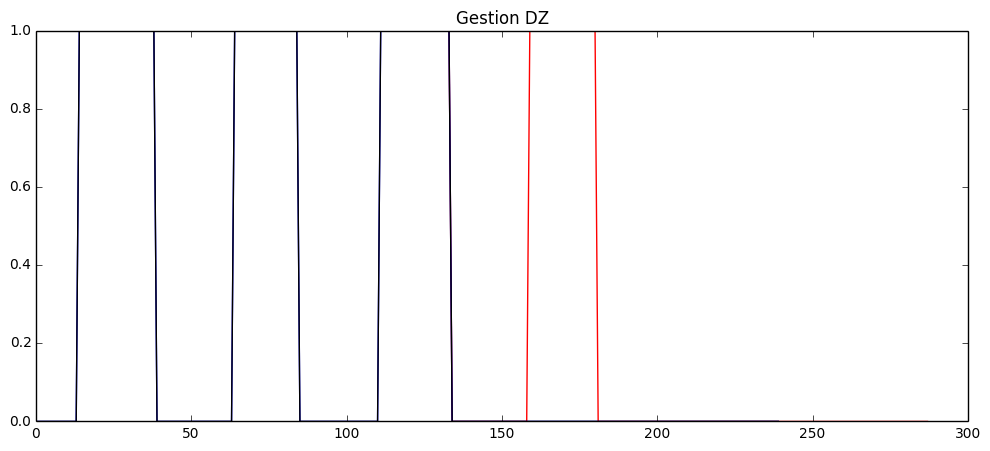

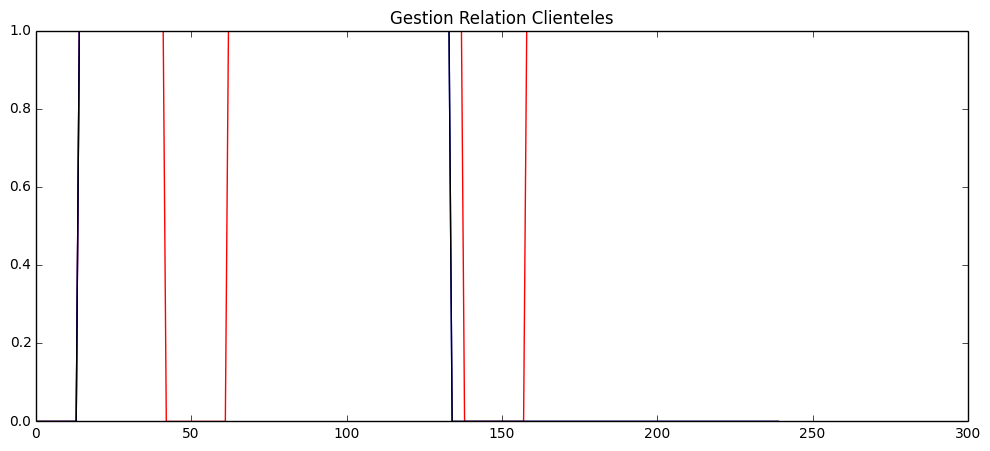

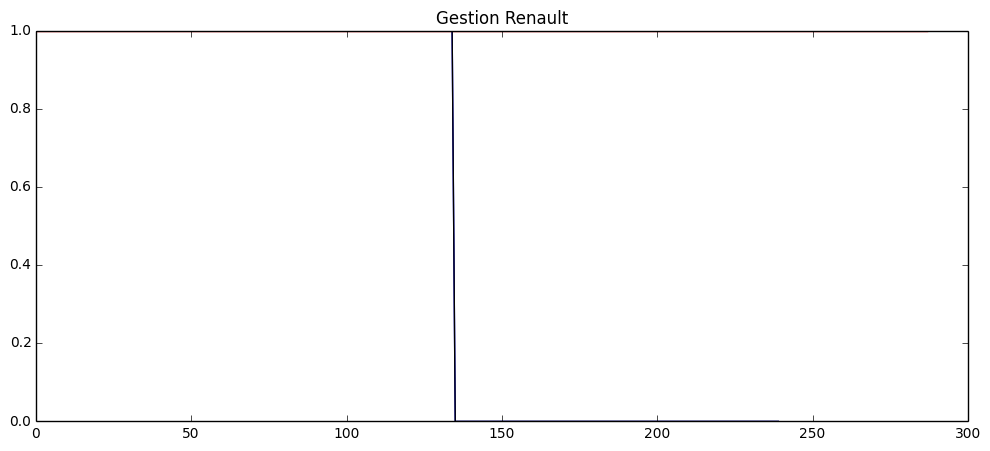

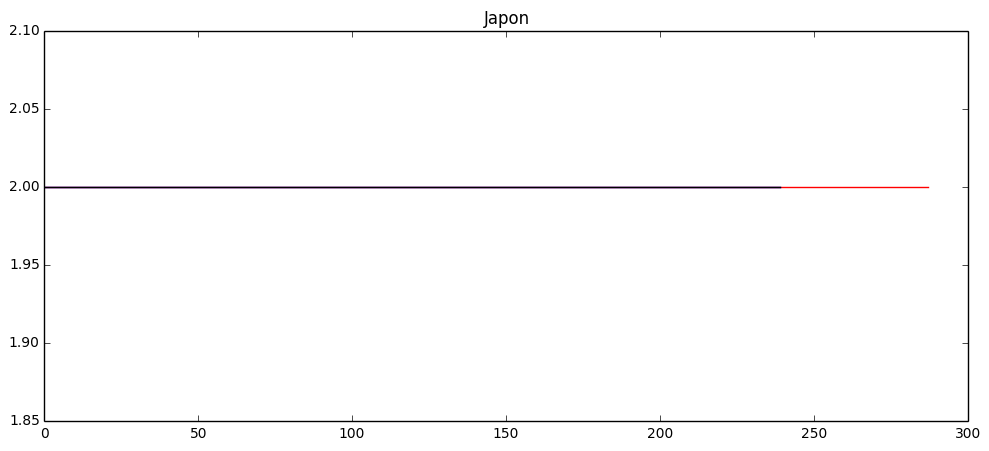

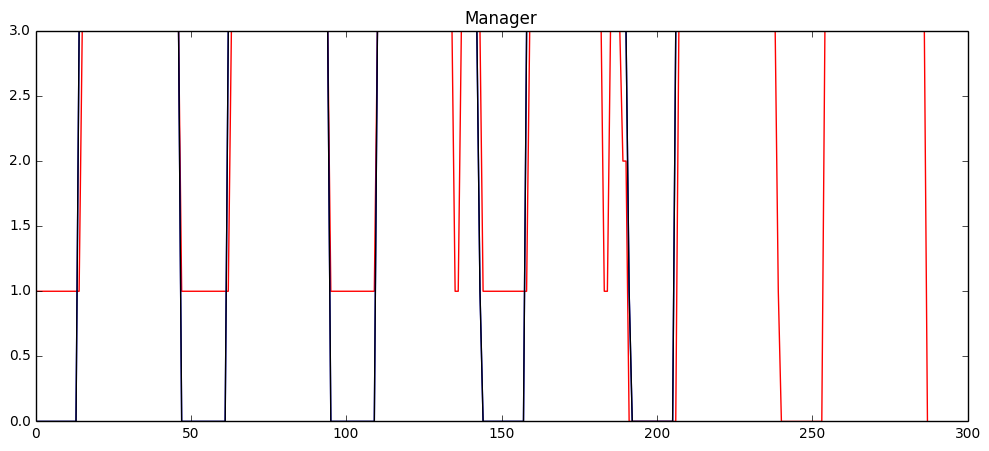

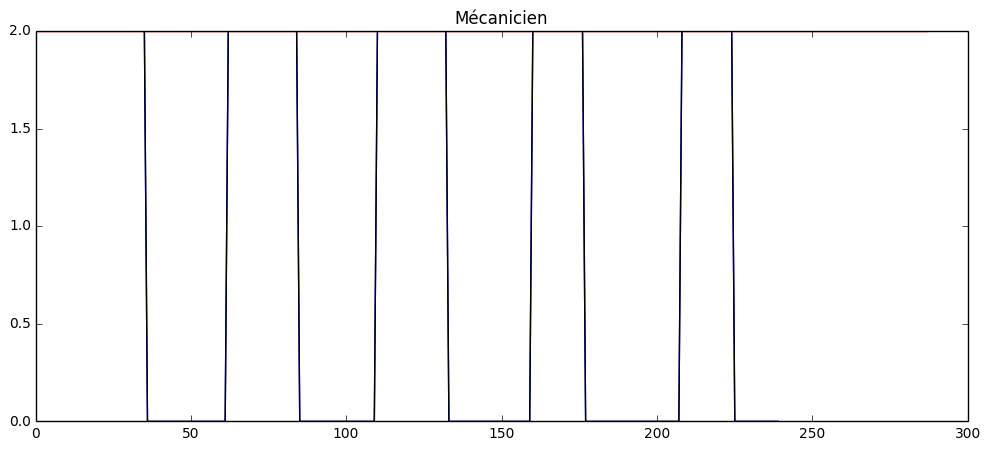

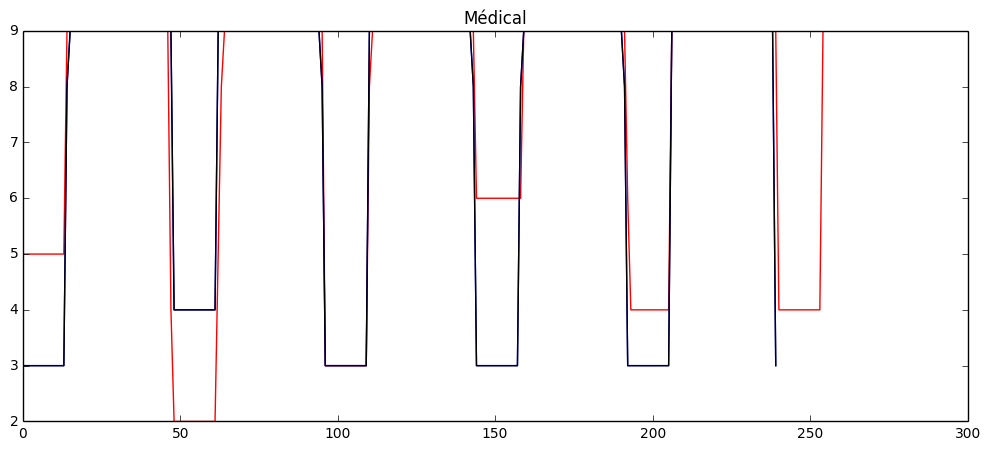

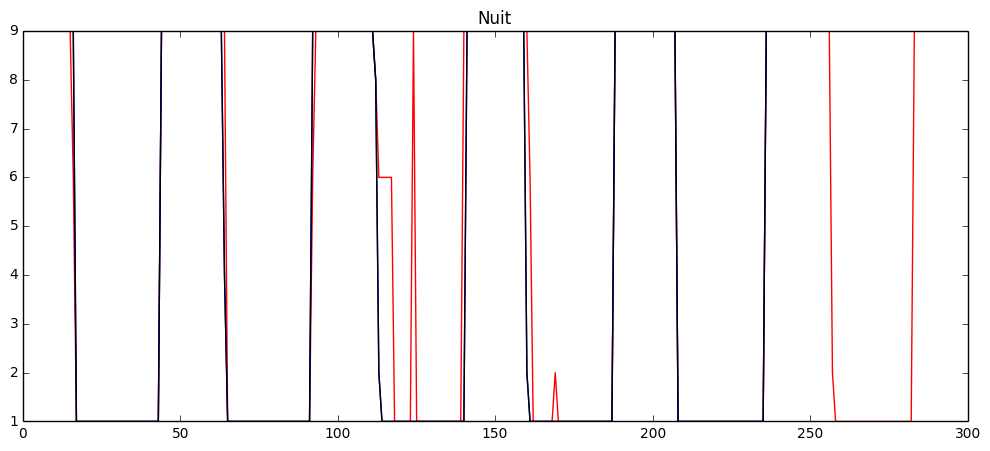

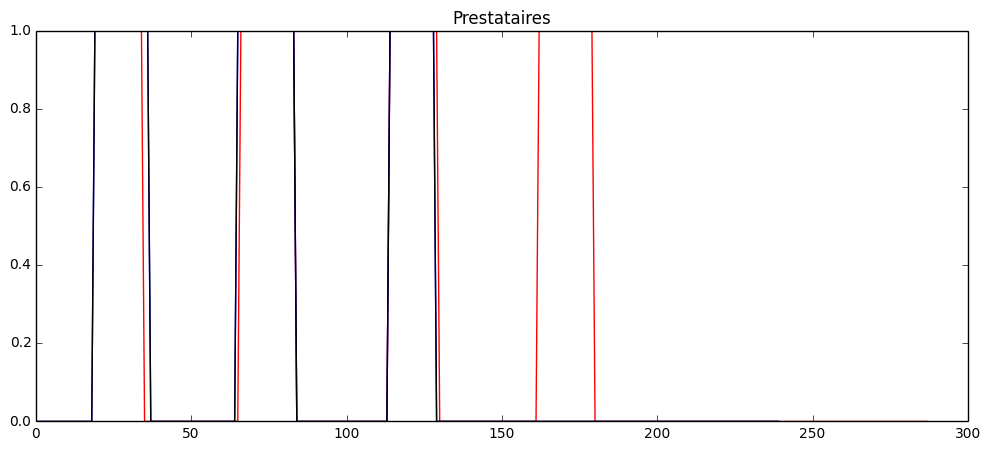

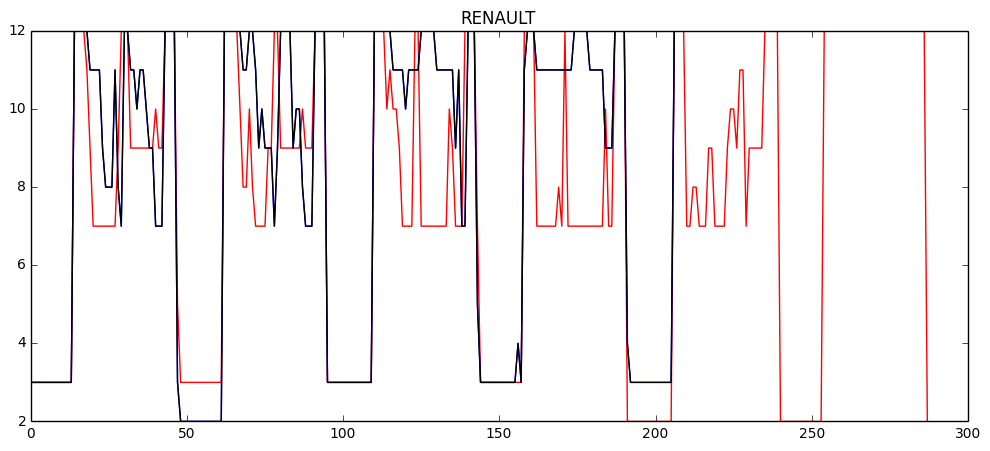

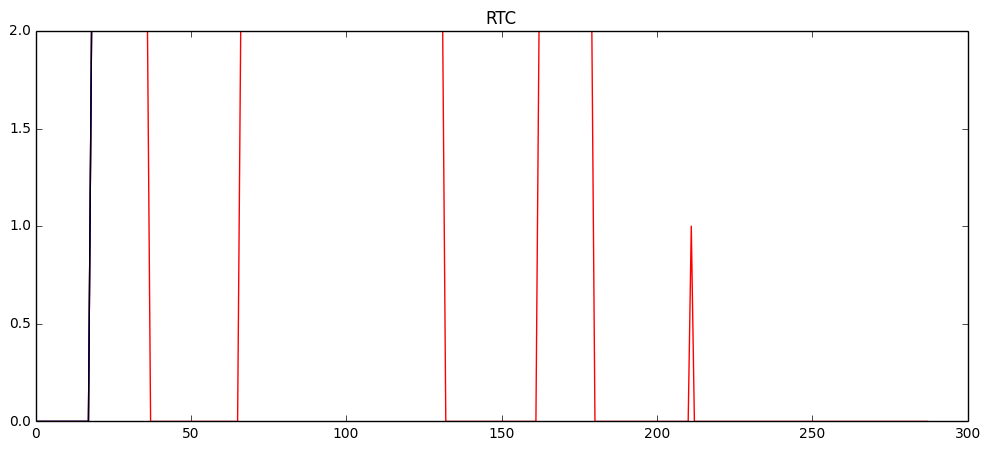

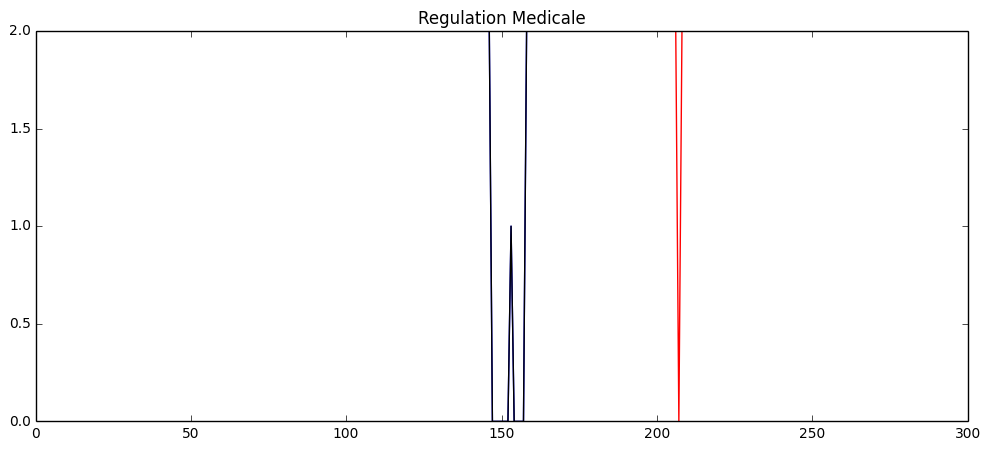

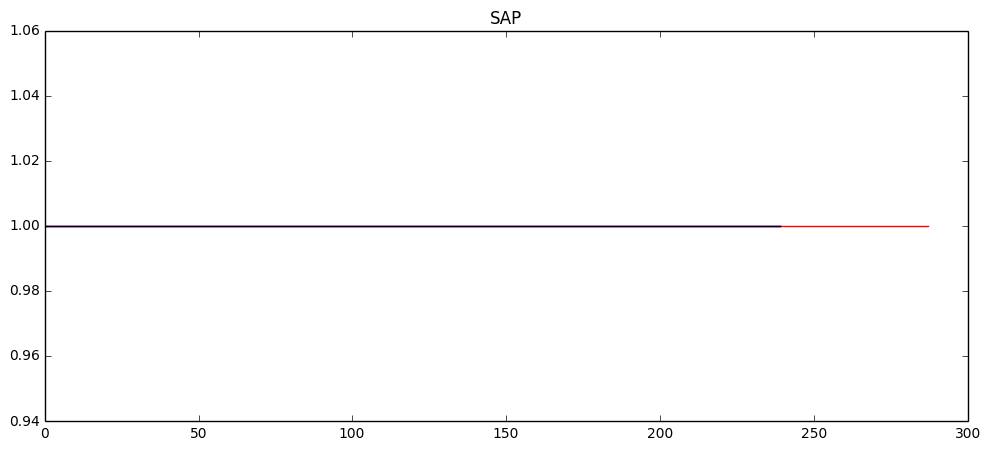

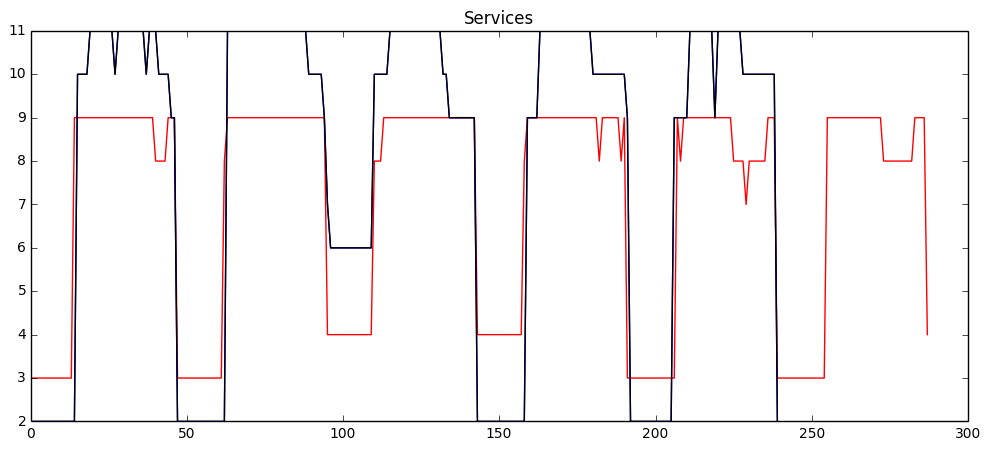

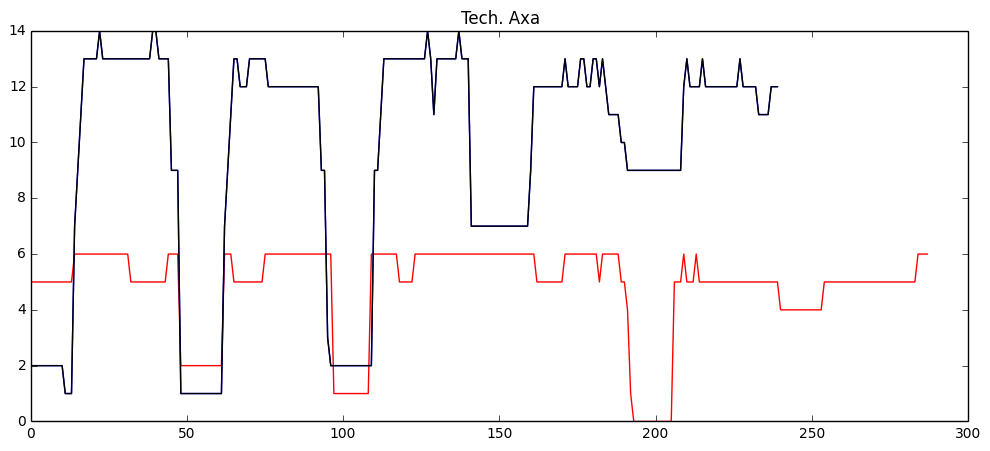

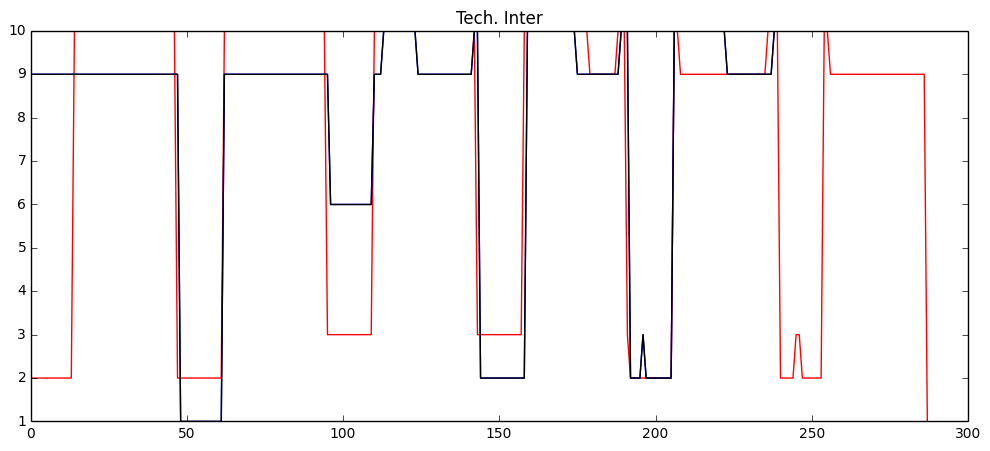

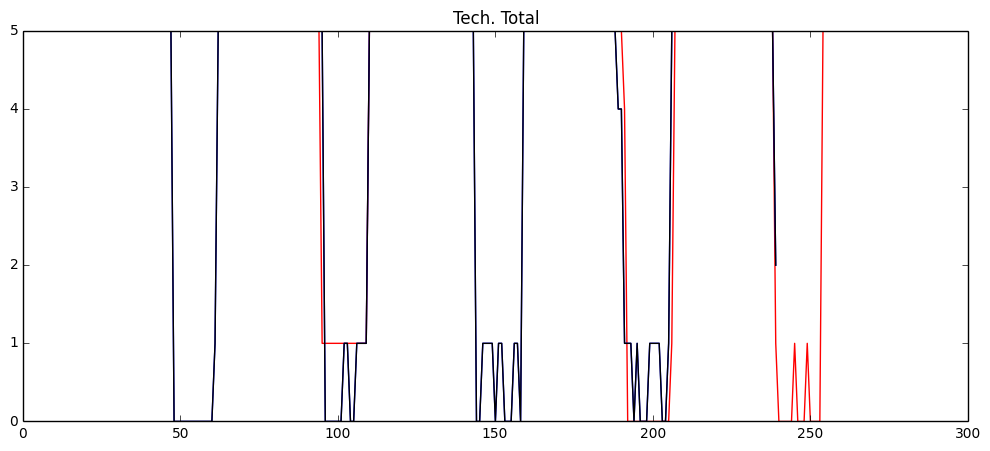

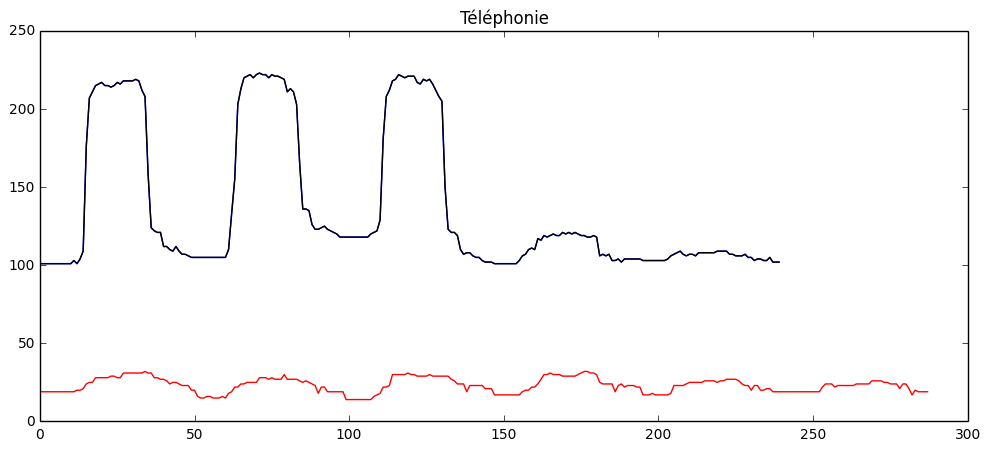

In [4]:
X_2011_week_df = X_2011_month_df[X_2011_month_df.index.week == 5]
X_2012_week_df = X_2012_month_df[X_2012_month_df.index.week == 5]
X_2013_week_df = X_2012_month_df[X_2012_month_df.index.week == 5]
plot_assignement_evolution([X_2011_week_df, X_2012_week_df, X_2013_week_df], ['red', 'blue', 'black'])

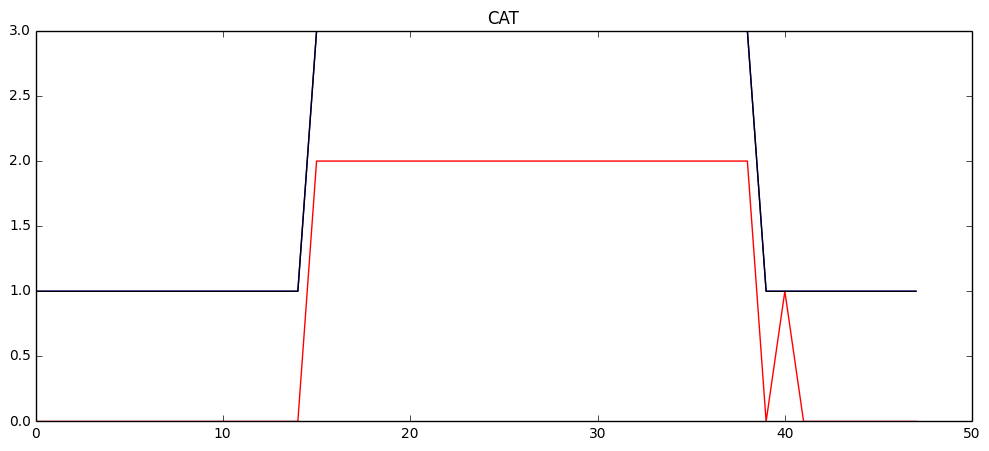

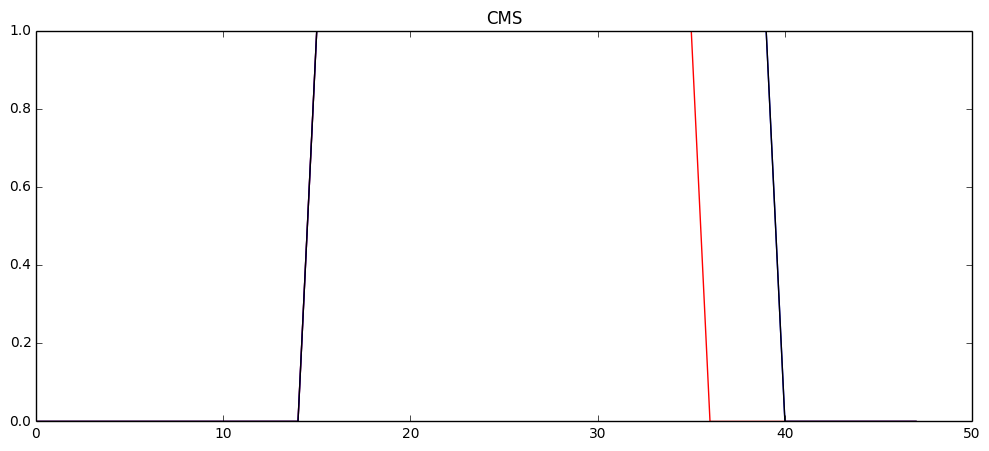

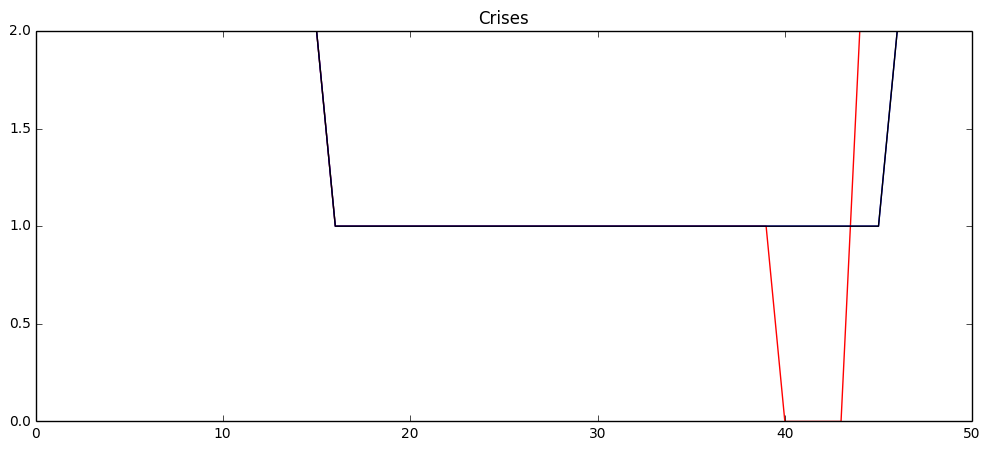

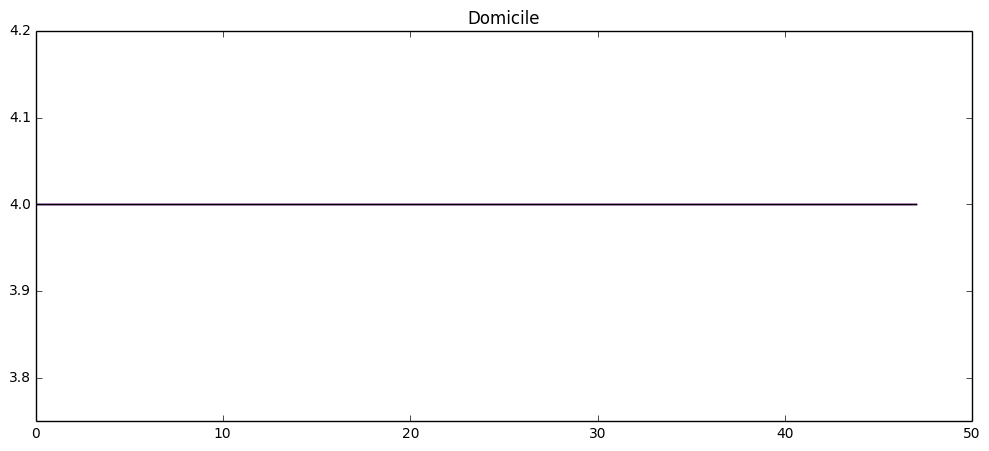

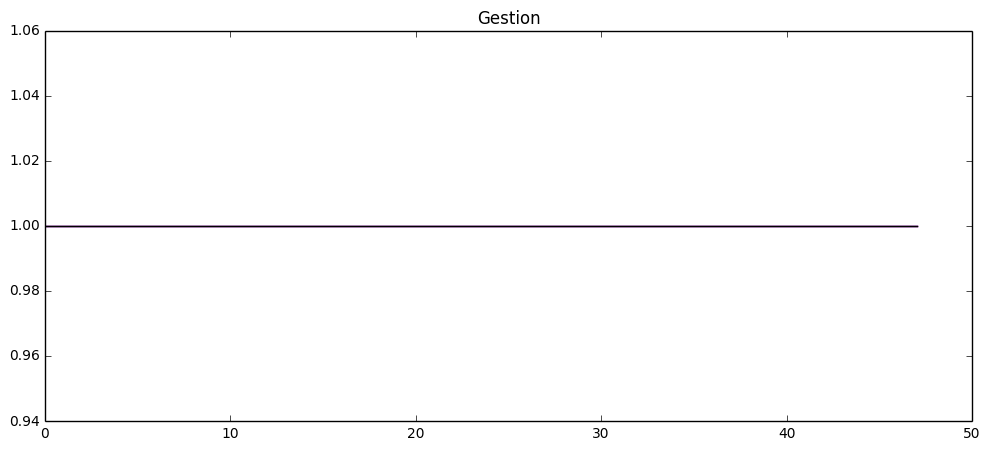

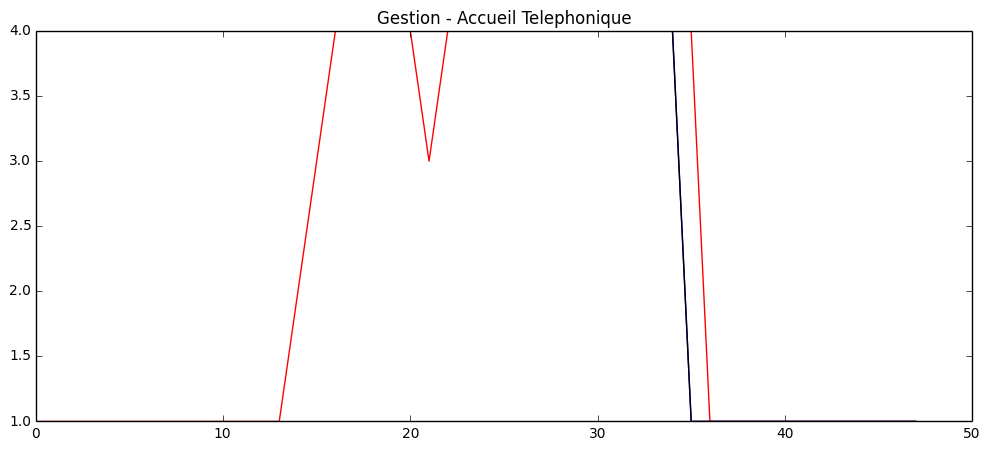

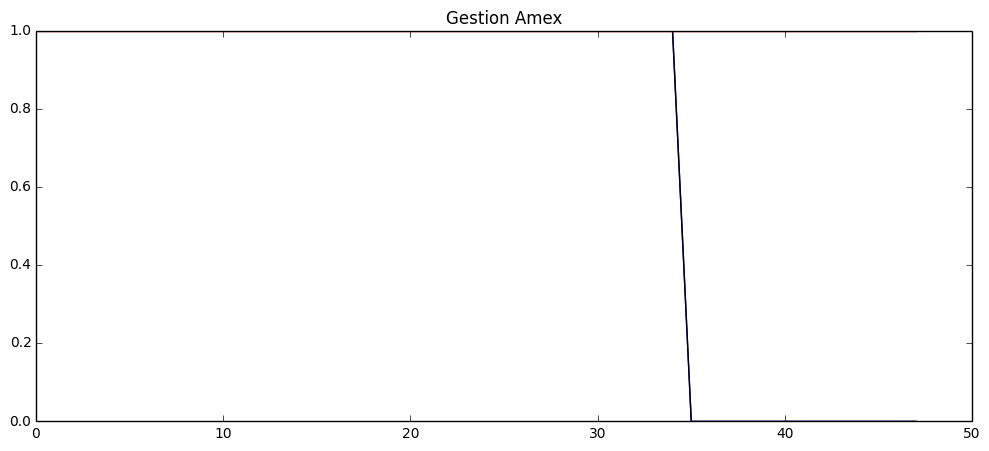

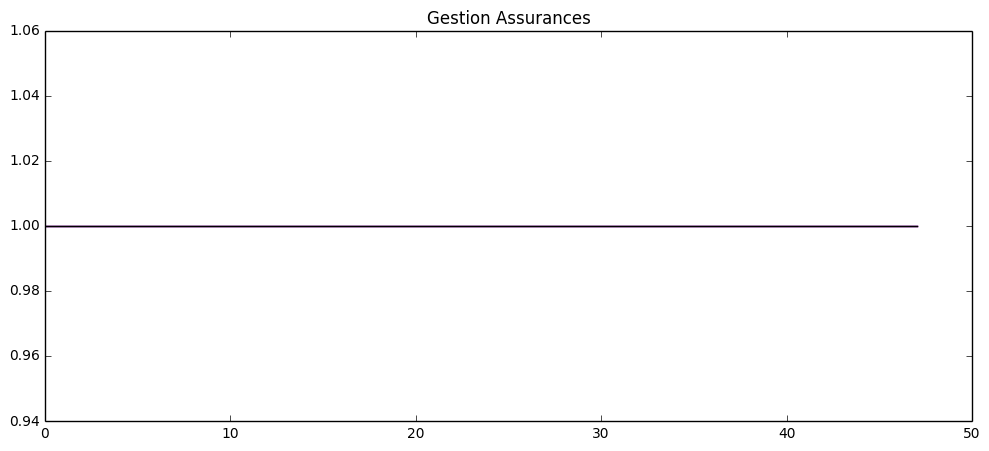

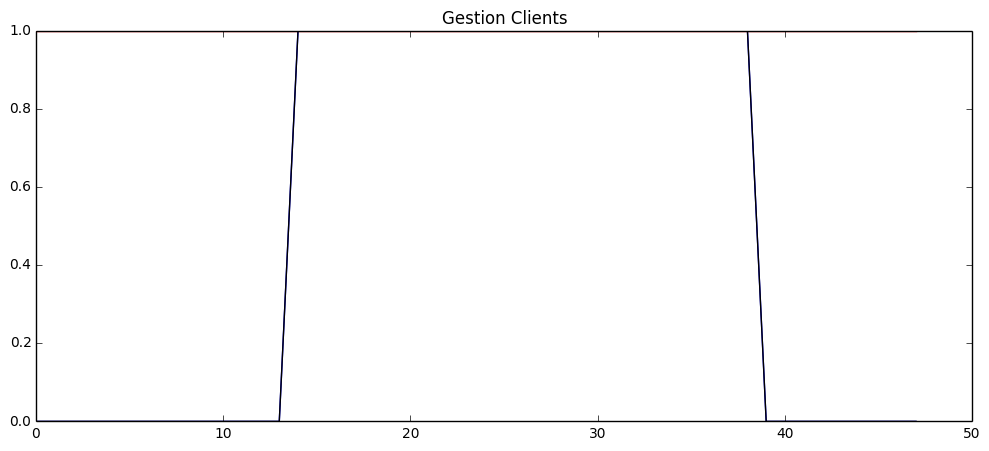

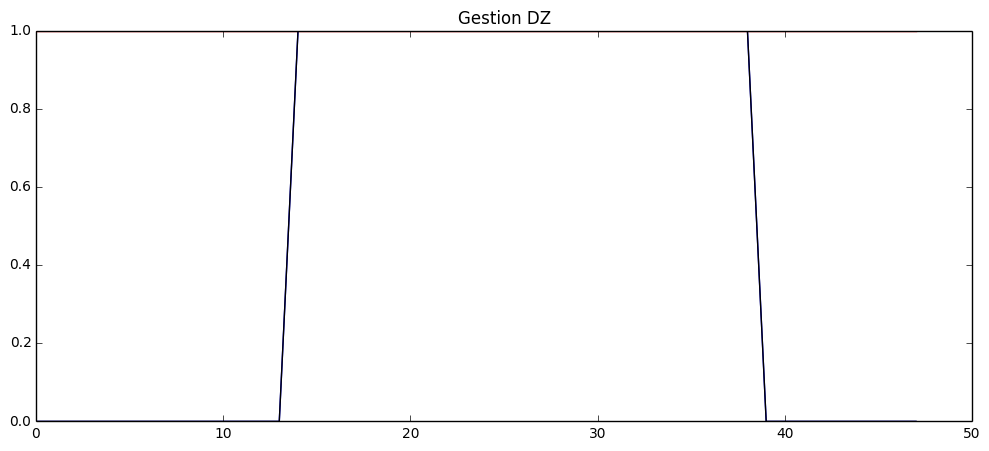

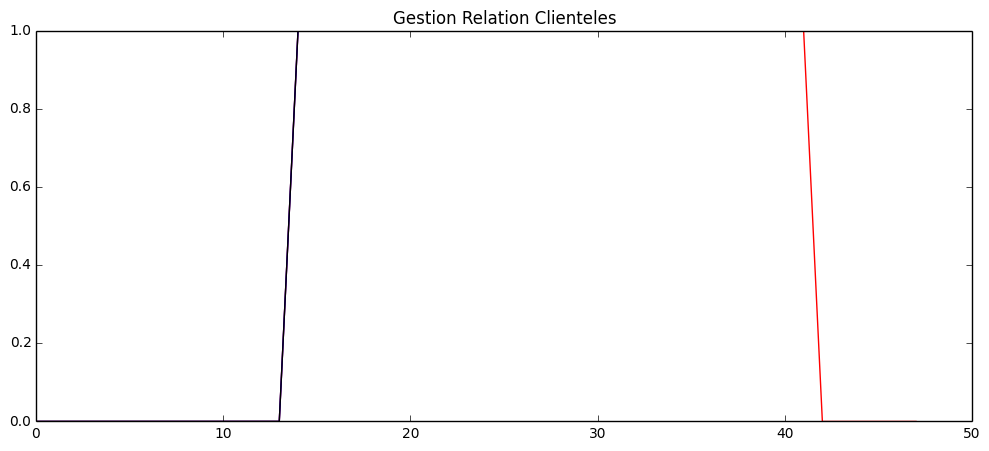

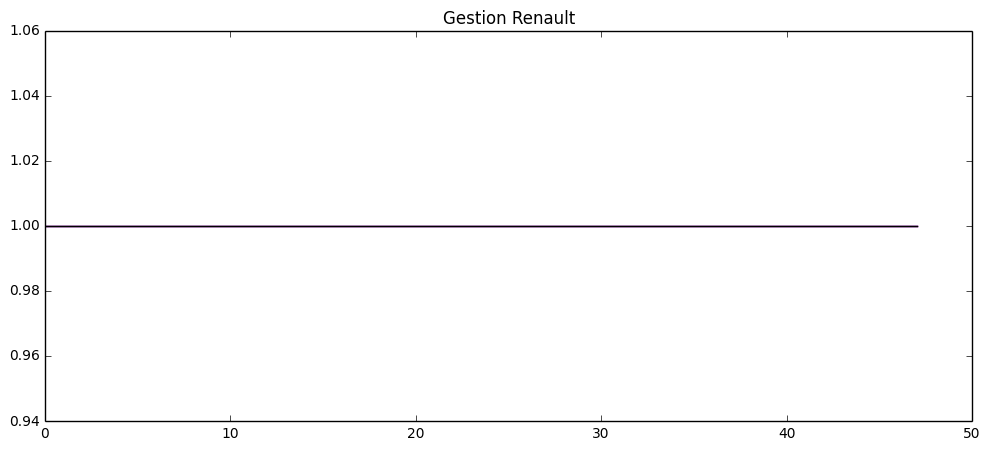

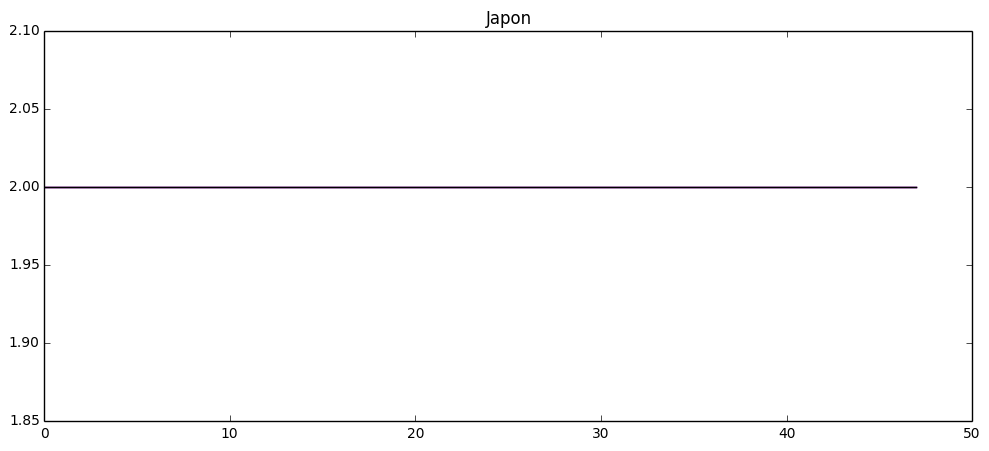

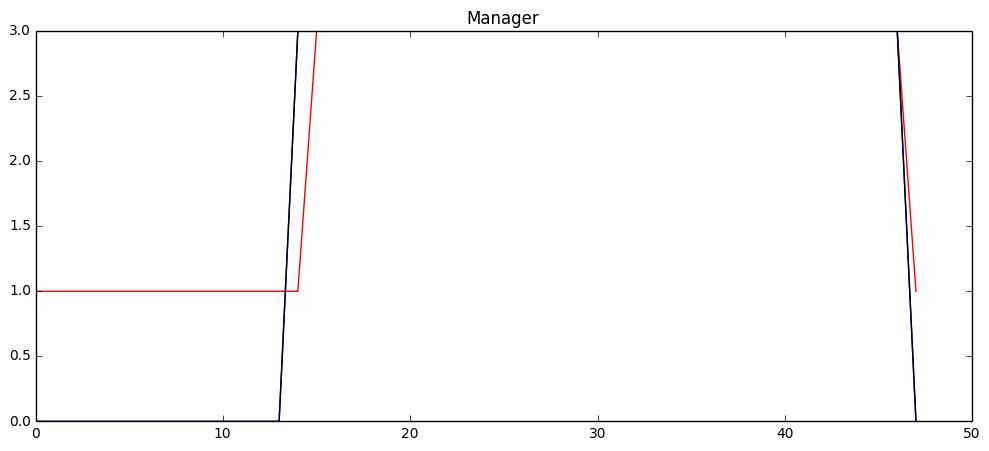

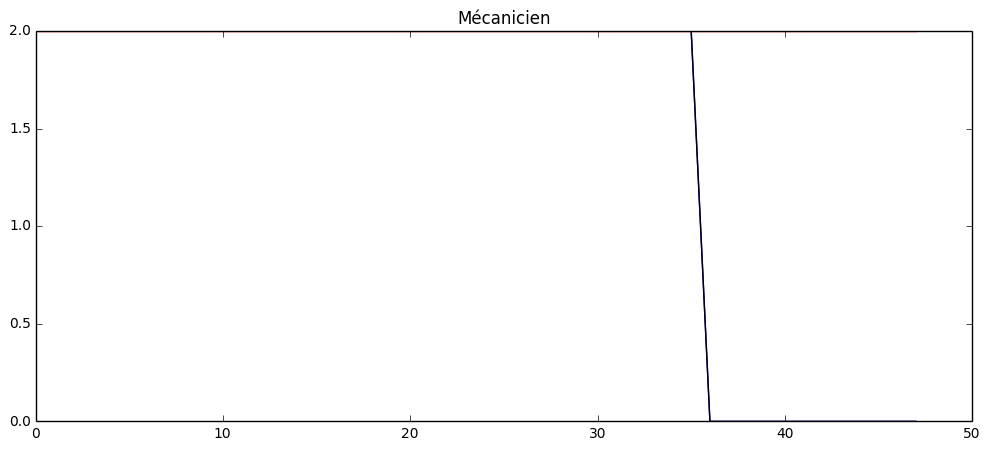

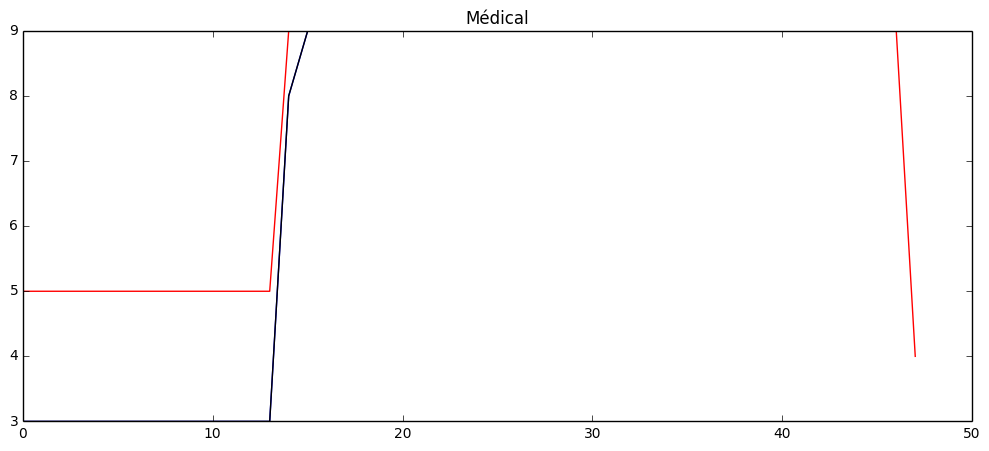

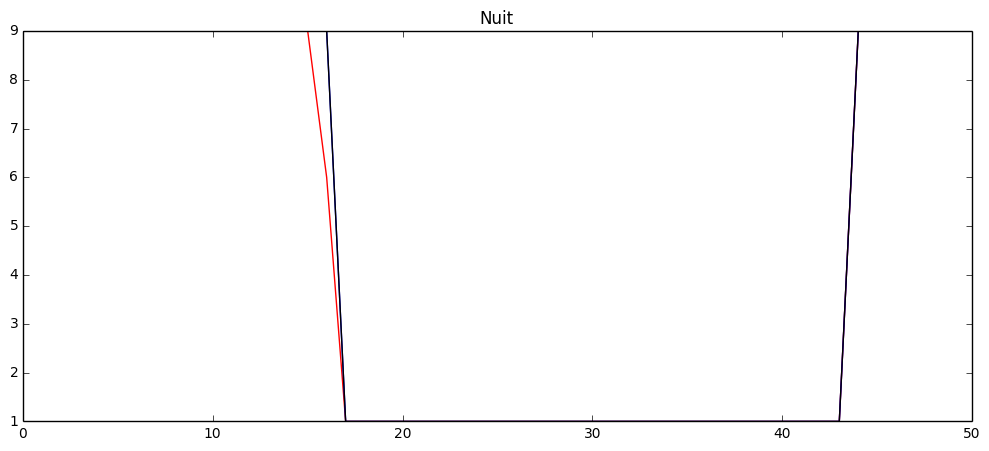

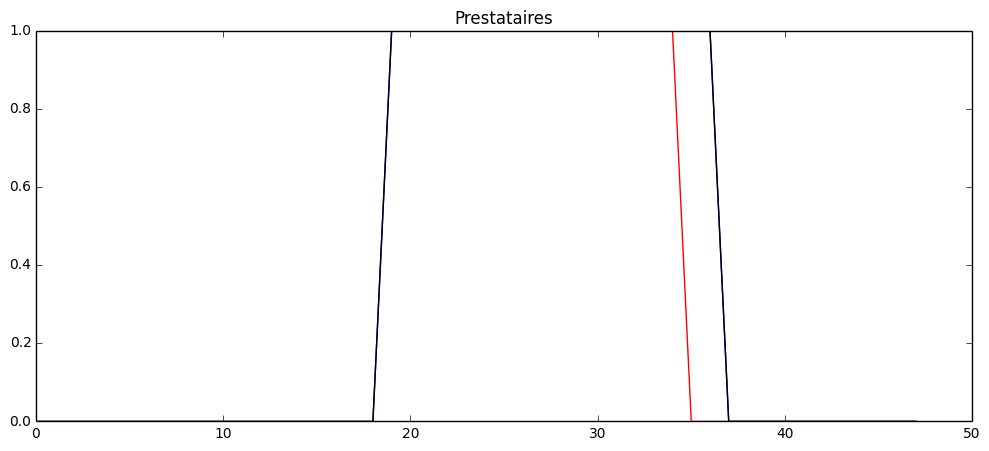

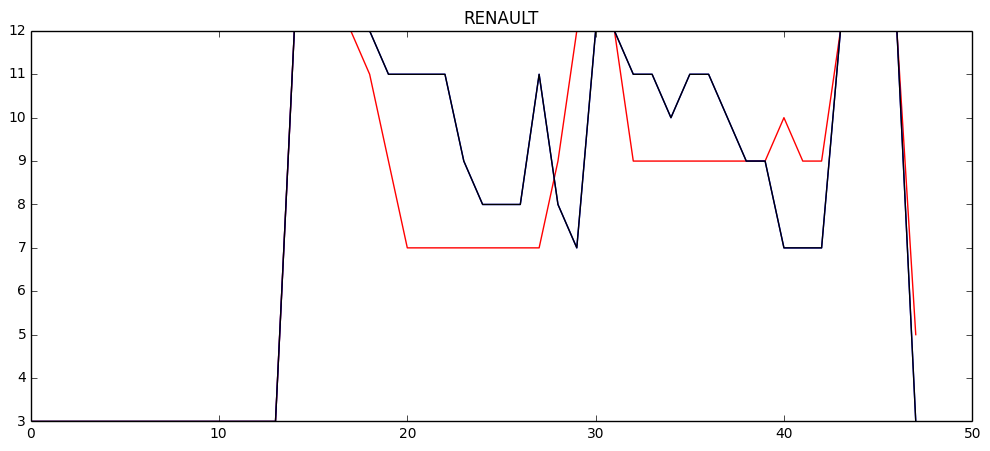

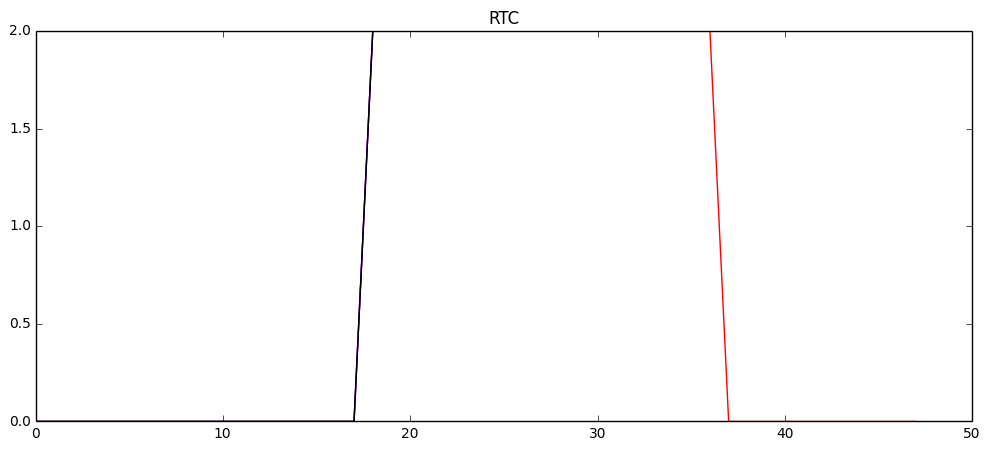

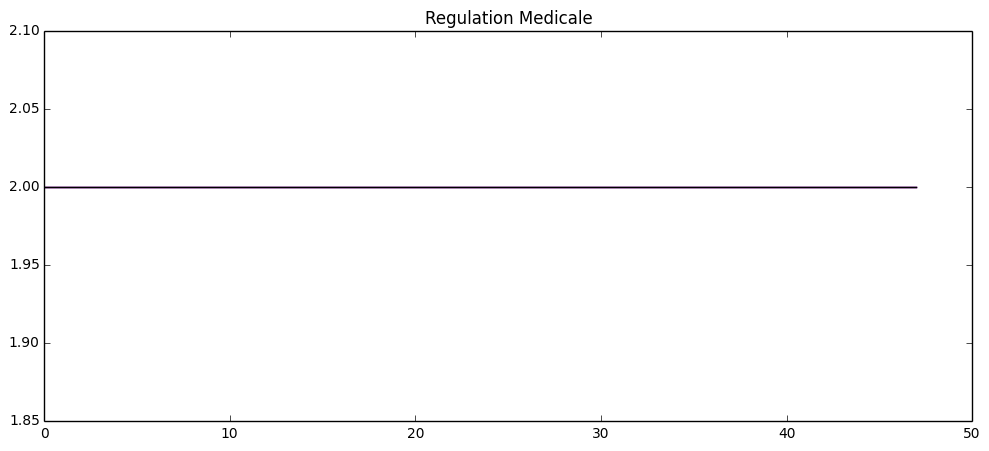

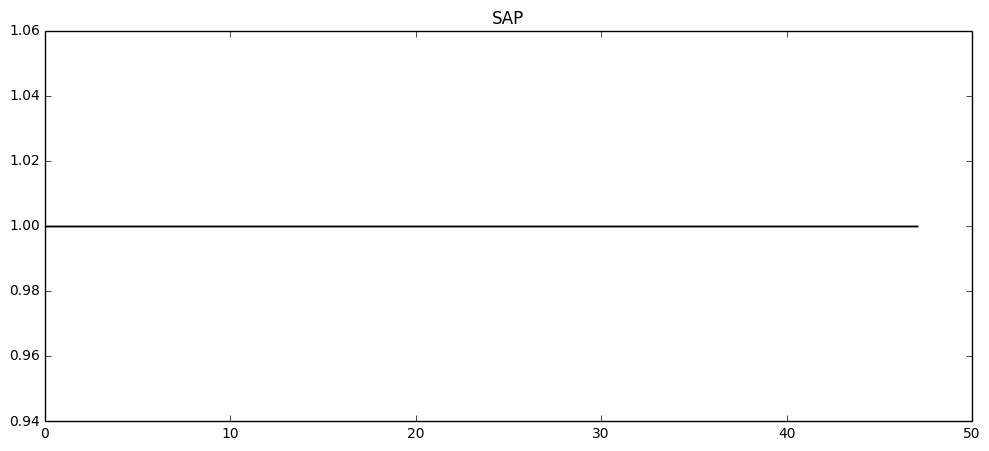

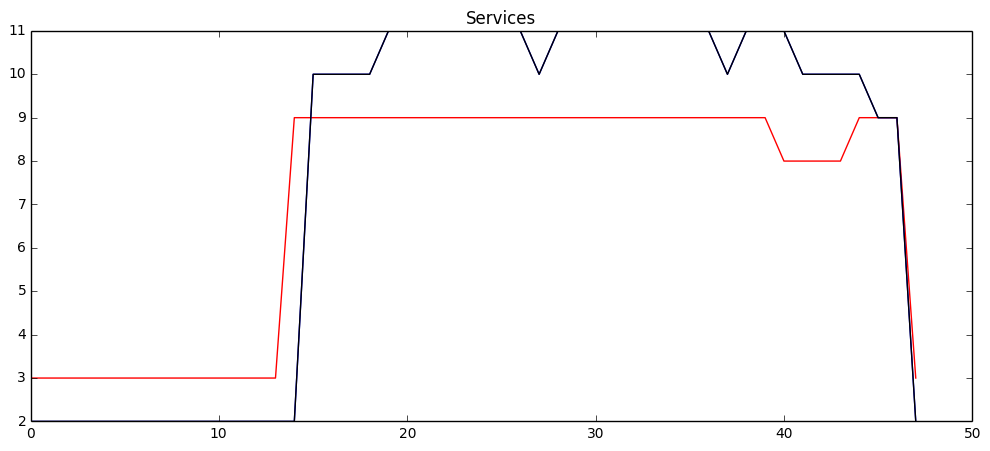

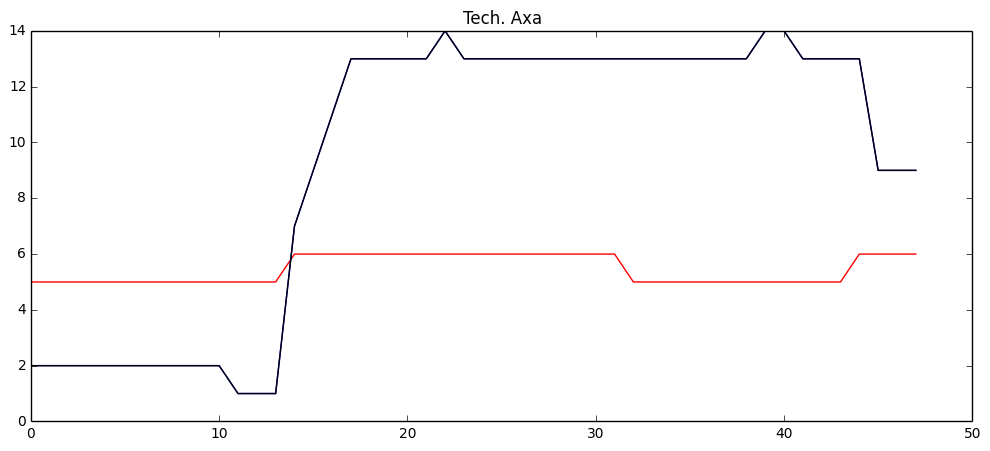

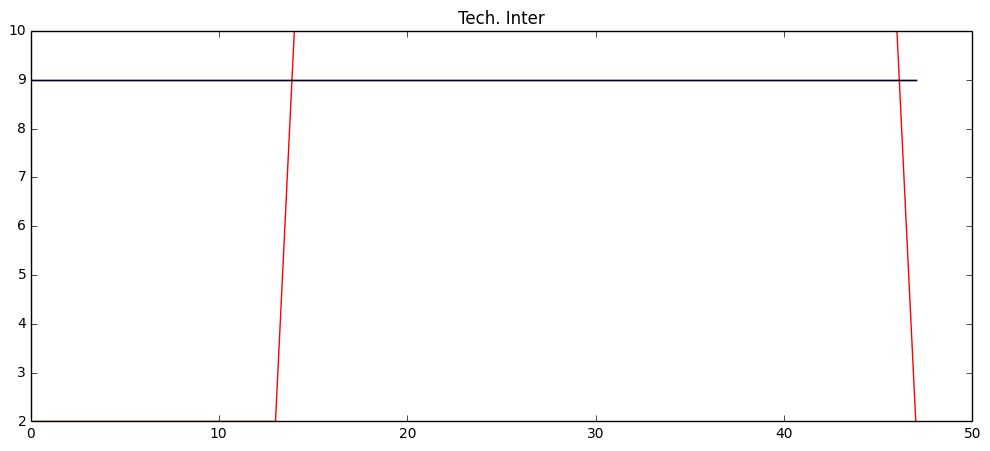

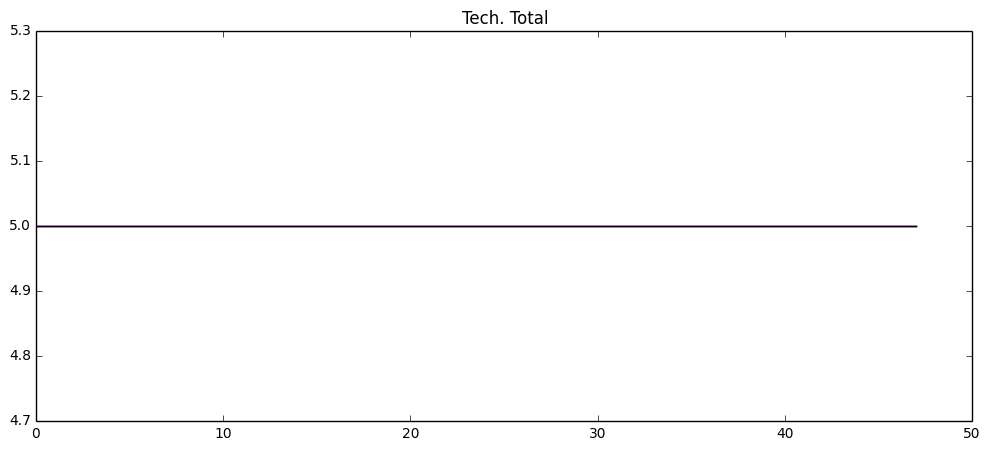

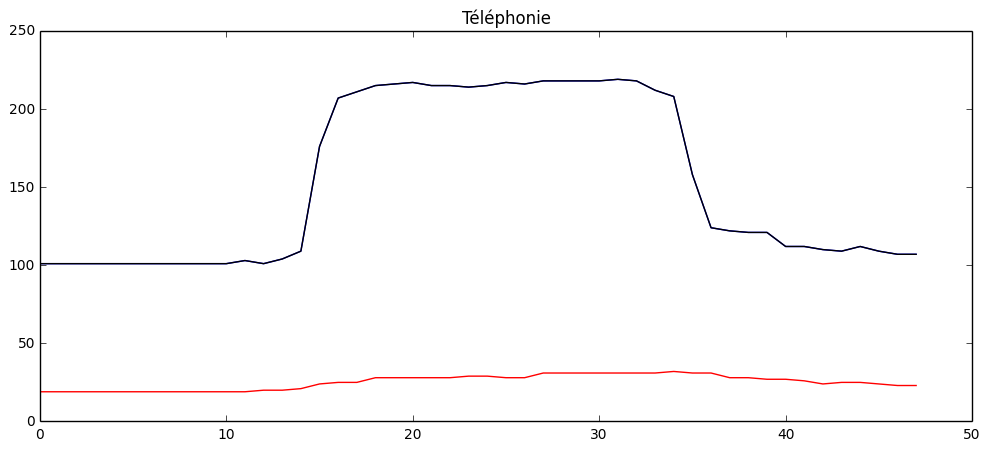

In [5]:
X_2011_day_df = X_2011_month_df[X_2011_month_df.index.day == 1]
X_2012_day_df = X_2012_month_df[X_2012_month_df.index.day == 1]
X_2013_day_df = X_2012_month_df[X_2012_month_df.index.day == 1]
plot_assignement_evolution([X_2011_day_df, X_2012_day_df, X_2013_day_df], ['red', 'blue', 'black'])

In [6]:
def get_mean(list_X_df):
    """return the means for each assignement for each X_df in list_X_df"""
    assignements = []
    for X_df in list_X_df:
        tmp = {}
        for assignement in X_df.columns:
            tmp[assignement] = X_df[assignement].mean()
        assignements.append(tmp)
    return assignements

In [16]:
assignements_means = get_mean([X_2011_month_df, X_2012_month_df, X_2013_month_df])
_ = assignements_means[0].pop('Gestion Amex')
_ = assignements_means[1].pop('Gestion Amex')

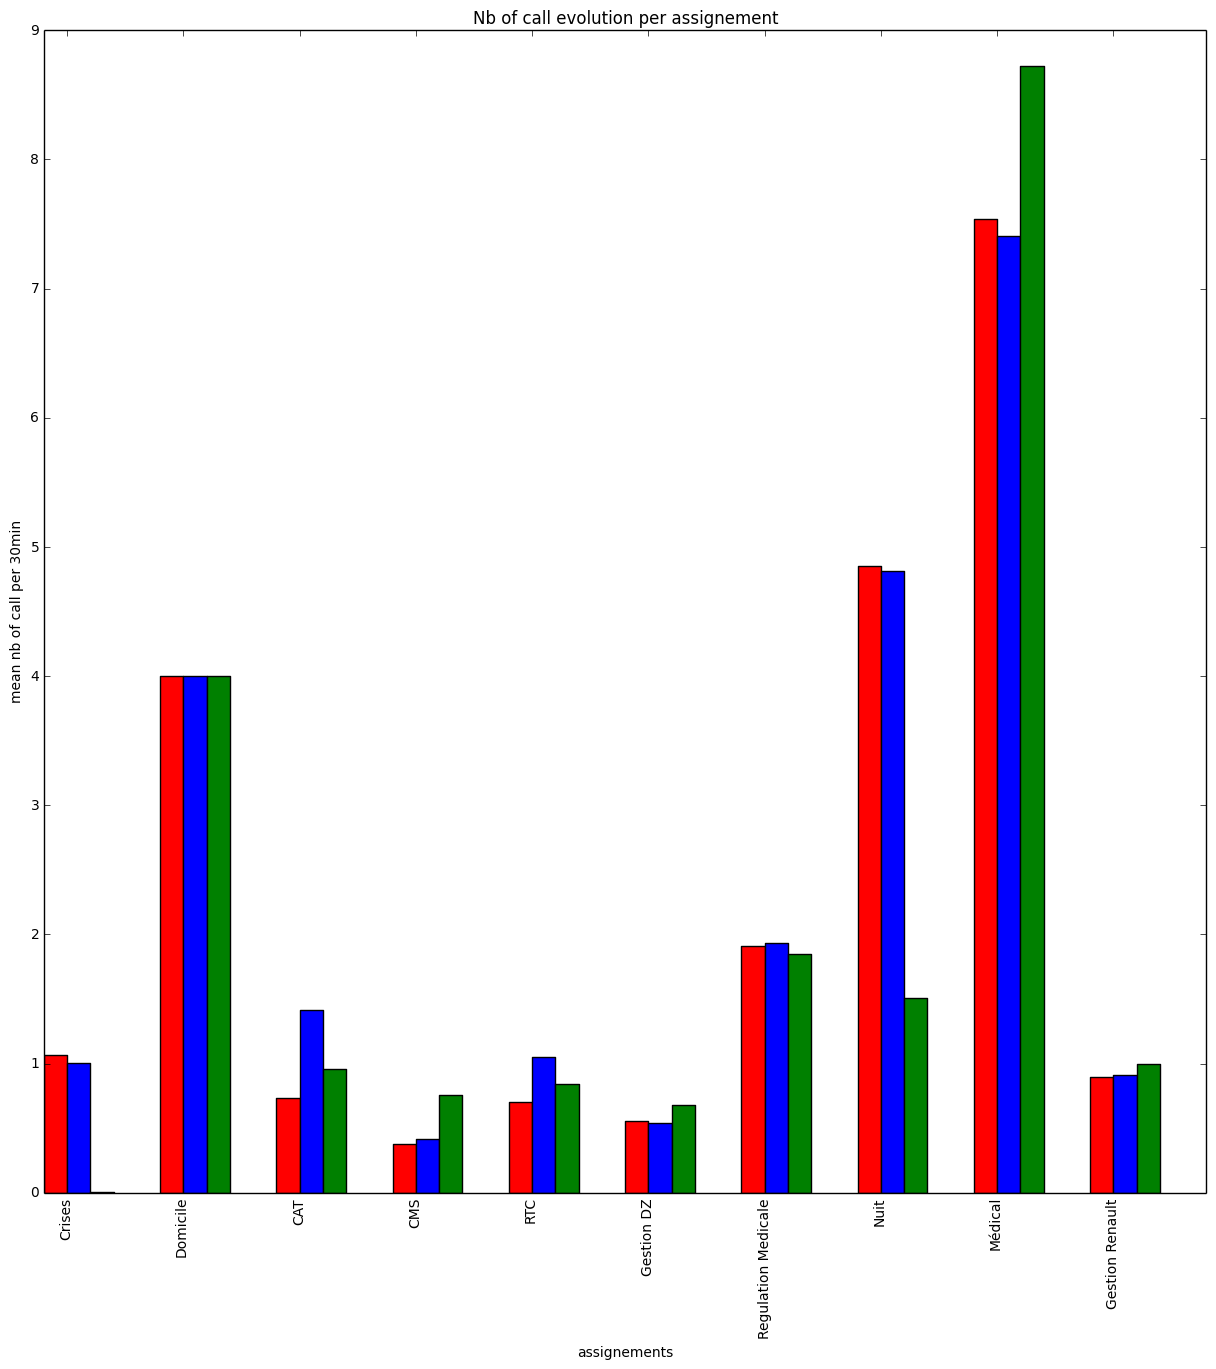

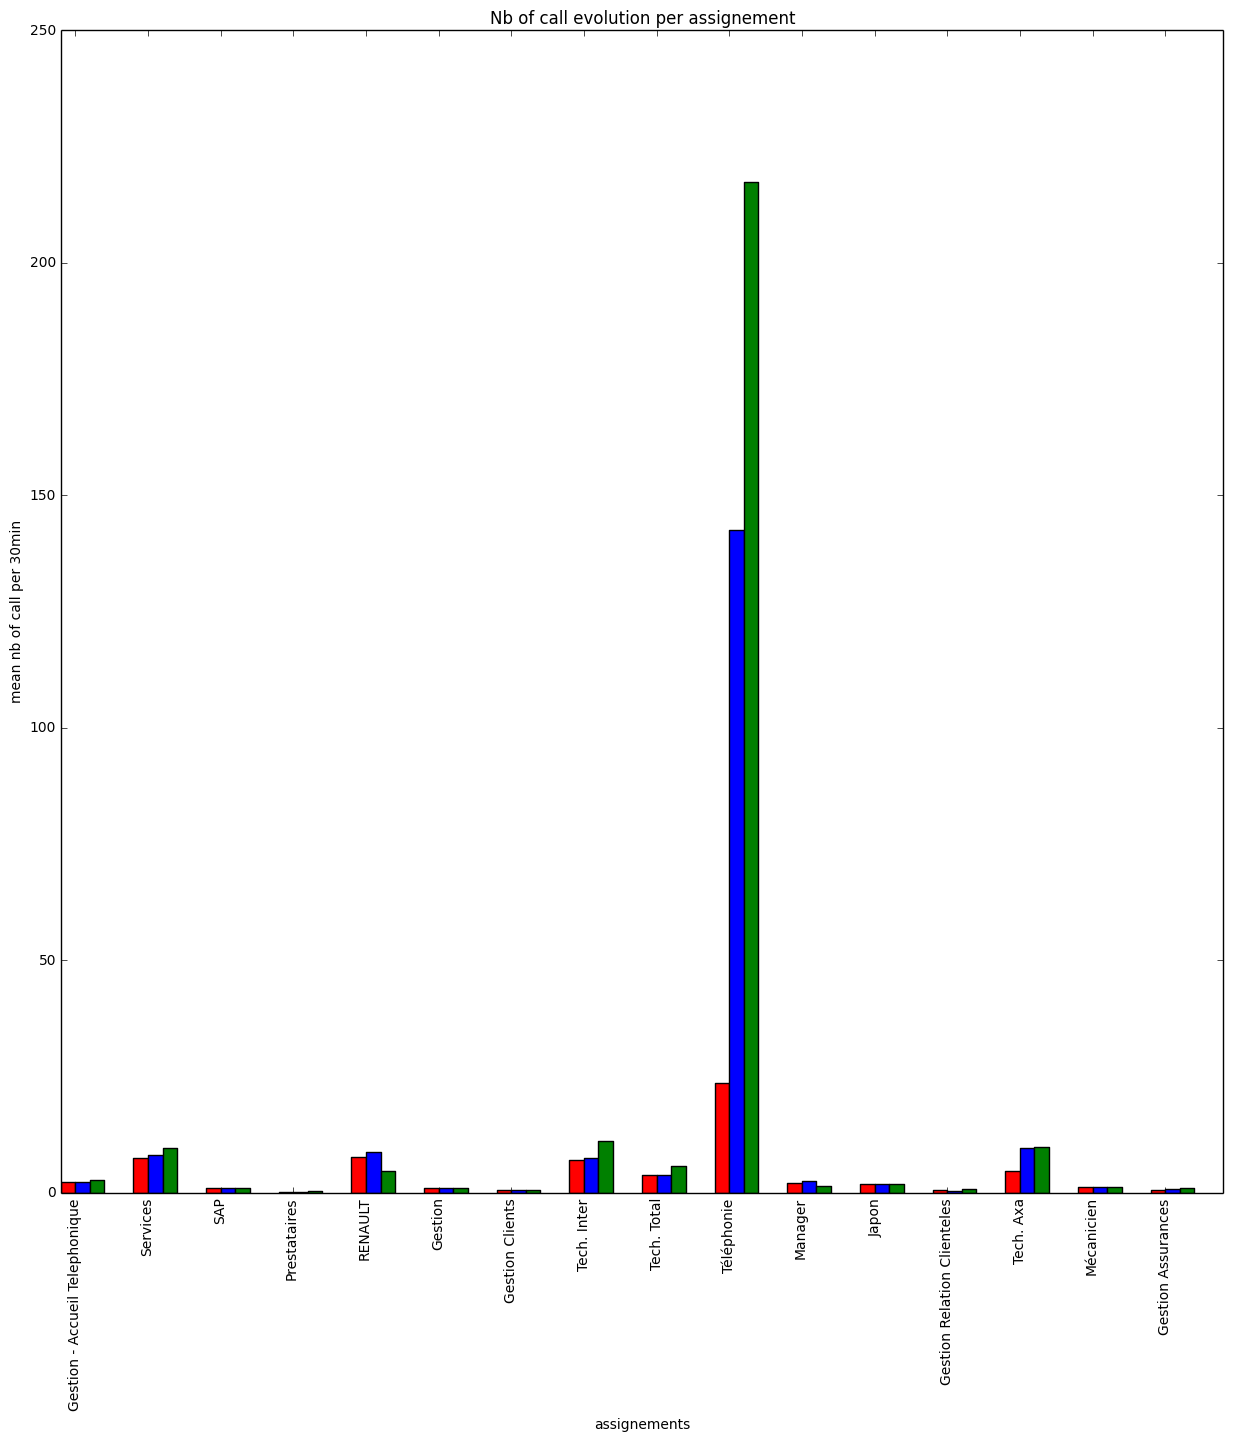

In [48]:
import numpy as np
width = 0.2
colors = ['r', 'b', 'g']

ind = np.arange(10)
fig, ax = plt.subplots(figsize=(15,15))
for i in range(len(assignements_means)):
    data = np.array(list(assignements_means[i].itervalues()))[:10]
    rects = plt.bar(ind + width*i, data, width, color=colors[i])
legend = [assign.decode('utf-8') for assign in list(assignements_means[i].iterkeys())[:10]]
plt.xticks(ind + width, legend, rotation='vertical')
plt.ylabel("mean nb of call per 30min")
plt.xlabel("assignements")
plt.title("Nb of call evolution per assignement")

ind = np.arange(16)
fig, ax = plt.subplots(figsize=(15,15))
for i in range(len(assignements_means)):
    data = np.array(list(assignements_means[i].itervalues()))[10:]
    rects = plt.bar(ind + width*i, data, width, color=colors[i])
legend = [assign.decode('utf-8') for assign in list(assignements_means[i].iterkeys())[10:]]
plt.xticks(ind + width, legend, rotation='vertical')
plt.ylabel("mean nb of call per 30min")
plt.xlabel("assignements")
plt.title("Nb of call evolution per assignement")